In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import *
import torch


/home/npp423/ML_tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/npp423/ML_tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/npp423/ML_tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/npp423/ML_tensorflow/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
def parse_image(image, y_size, x_size):
    """Parse salt image/label into small patches."""
    RAW_PATCH_SIZE=64
    num_patches_per_x = x_size // RAW_PATCH_SIZE
    num_patches_per_y = y_size // RAW_PATCH_SIZE
    x_size_crop = num_patches_per_x * RAW_PATCH_SIZE
    y_size_crop = num_patches_per_y * RAW_PATCH_SIZE
    # There won't be any crop if (size % patch_size == 0).
    image = image[0:x_size_crop, 0:y_size_crop]
    patches = image.reshape(num_patches_per_x, RAW_PATCH_SIZE,
                            num_patches_per_y, RAW_PATCH_SIZE)
    patches = patches.transpose(0,2, 1,3)
    patches = patches.reshape(num_patches_per_x * num_patches_per_y,
                              RAW_PATCH_SIZE, RAW_PATCH_SIZE)
    return patches

In [3]:
def random_mini_batches(X, Y,Z, mini_batch_size = 1):
    import math
    import numpy as np
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
   
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:,:,:]
    shuffled_Z = Z[permutation,:,:,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(math.floor(m/mini_batch_size)) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Z = shuffled_Z[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch = (mini_batch_X, mini_batch_Y,mini_batch_Z)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Z = shuffled_Z[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch = (mini_batch_X, mini_batch_Y,mini_batch_Z)
        mini_batches.append(mini_batch)
    
    
    return mini_batches

In [4]:
def random_mini_batches_test(X, Y, mini_batch_size = 1):
    import math
    import numpy as np
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
   
    
    

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = int(math.floor(m/mini_batch_size)) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = Y[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    
    return mini_batches

In [5]:
'''Load seismic'''
import numpy as np

noisy = np.fromfile('/mnt/ranch/npp423/groundroll/datpatch3.rsf@',np.float32)
noisy = np.reshape(noisy,(3,2,6,64,400))
print(noisy.shape)

noise = np.fromfile('/mnt/ranch/npp423/groundroll/prepatch3.rsf@',np.float32)
noise = np.reshape(noise,(3,2,6,64,400))
print(noise.shape)

signal = np.fromfile('/mnt/ranch/npp423/groundroll/sigpatch3.rsf@',np.float32)
signal = np.reshape(signal,(3,2,6,64,400))
print(signal.shape)

image_i=np.reshape(noisy[:,:,0:5,:,:],(3*2*5,64,400,1))
image_j=np.reshape(signal[:,:,0:5,:,:],(3*2*5,64,400,1))
image_k=np.reshape(noise[:,:,0:5,:,:],(3*2*5,64,400,1))

inputsori = {
    'image_i': image_i,
    'image_j': image_j,
    'image_k': image_k
}

print(image_j.shape)
print(image_i.shape)
print(image_k.shape)

m1=np.mean(inputsori['image_i'])    
s1=np.std(inputsori['image_i'])
m2=np.mean(inputsori['image_j'])    
s2=np.std(inputsori['image_j'])
m3=np.mean(inputsori['image_k'])    
s3=np.std(inputsori['image_k'])
inputsori['image_i'] = (inputsori['image_i']-m1)/(s1)
inputsori['image_j'] = (inputsori['image_j']-m2)/(s2)
inputsori['image_k'] = (inputsori['image_k']-m3)/(s3)




(3, 2, 6, 64, 400)
(3, 2, 6, 64, 400)
(3, 2, 6, 64, 400)
(30, 64, 400, 1)
(30, 64, 400, 1)
(30, 64, 400, 1)


In [6]:
testsignal = np.reshape(signal[:,:,5,:,:],(-1,64,160))

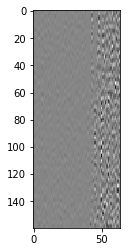

In [7]:
plt.imshow(np.transpose(testsignal[0,:,:]),cmap='gray')

In [8]:
testnoise = np.reshape(noise[:,:,5,:,:],(-1,64,160))

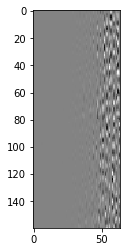

In [9]:
plt.imshow(np.transpose(testnoise[0,:,:]),cmap='gray')

In [10]:
testsignalfk = np.fft.fft2(testsignal)[:,:,0:80]

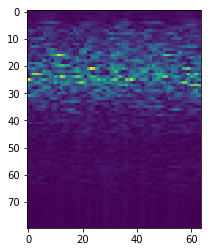

In [11]:
plt.imshow(np.transpose(np.abs(testsignalfk[0,:,:])))

In [29]:
testnoisefk = np.fft.fft2(testnoise)[:,:,0:80]

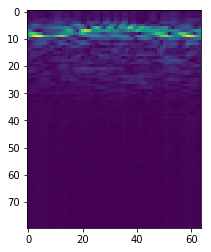

In [30]:
plt.imshow(np.transpose(np.abs(testnoisefk[0,:,:])))

In [44]:
X = np.concatenate((np.abs(testsignalfk),np.abs(testnoisefk)),axis=0)
X.shape

(30, 64, 80)

In [37]:
# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits

# We'll hack a bit with the t-SNE code in sklearn 0.15.2.
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
# Random state.
RS = 20150101

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [252]:
proj = TSNE(n_components=100,method='exact').fit_transform(np.reshape(X,(30,64*80)))

In [241]:
colors = np.concatenate((np.zeros(15),np.ones(15)))
colors.shape

(30,)

In [242]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 2))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(2):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)[0:2]
        txt = ax.text(xtext, ytext, str(i), fontsize=7)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.show()
    
    return f, ax, sc,txts

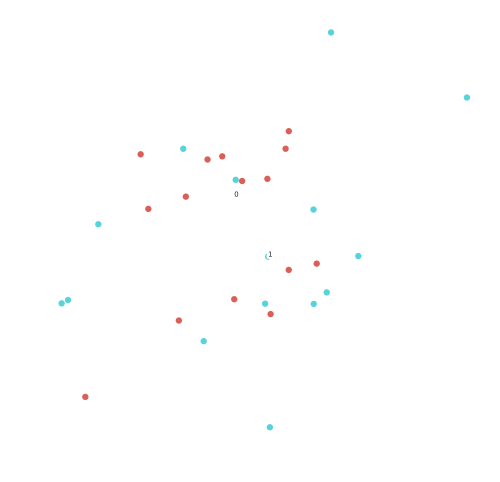

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.0805336,1.04392,'0'), Text(0.736561,-0.580432,'1')])

In [253]:
scatter(proj,colors)

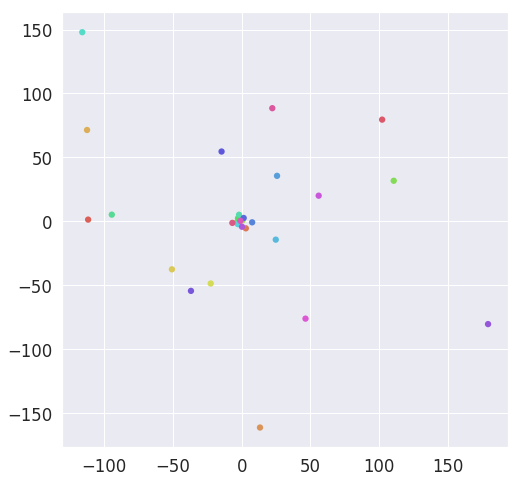

In [152]:
plt.figure(figsize=(8, 8))
plt.scatter(proj[:,0],proj[:,1],lw=0, s=40,c=palette[colors.astype(np.int)])

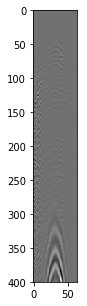

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(np.transpose(inputsori['image_i'][10,:,:,0]),cmap='gray')

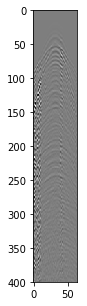

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(np.transpose(inputsori['image_j'][10,:,:,0]),cmap='gray')

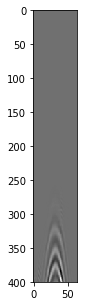

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(np.transpose(inputsori['image_k'][10,:,:,0]),cmap='gray')

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()

        conv_block = [  nn.ReflectionPad2d((10,10,1,1)),
                        nn.Conv2d(in_features, in_features, (3,21)),
                        nn.InstanceNorm2d(in_features),
                        nn.ReLU(inplace=True),
                        nn.ReflectionPad2d((10,10,1,1)),
                        nn.Conv2d(in_features, in_features, (3,21)),
                        nn.InstanceNorm2d(in_features)  ]

        self.conv_block = nn.Sequential(*conv_block)

    def forward(self, x):
        return x + self.conv_block(x)


In [10]:
class Generator(nn.Module):
    def __init__(self, input_nc, output_nc, n_residual_blocks=9):
        super(Generator, self).__init__()

        # Initial convolution block       
        model = [   nn.ReflectionPad2d((24,24,3,3)),
                    nn.Conv2d(input_nc, 32, (7,49)),
                    nn.InstanceNorm2d(32),
                    nn.ReLU(inplace=True) ]

        # Downsampling
        in_features = 32
        out_features = in_features*2
        for _ in range(2):
            model += [  nn.Conv2d(in_features, out_features, (3,21),padding=(1,10)),
                        nn.InstanceNorm2d(out_features),
                        nn.ReLU(inplace=True) ]
            in_features = out_features
            out_features = in_features*2
            model +=[torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)]
        # Residual blocks
        for _ in range(n_residual_blocks):
            model += [ResidualBlock(in_features)]

        # Upsampling
        out_features = in_features//2
        for _ in range(2):
            model += [nn.Upsample(scale_factor = 2, mode='bilinear',align_corners=True),nn.ReflectionPad2d((10,10,1,1)),nn.Conv2d(in_features, out_features,kernel_size=(3,21), stride=1, padding=0),nn.InstanceNorm2d(out_features),nn.ReLU(inplace=True)]
            #model += [nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1),nn.InstanceNorm2d(out_features),nn.ReLU(inplace=True) ]
            in_features = out_features
            out_features = in_features//2

        # Output layer
        model += [  nn.ReflectionPad2d((24,24,3,3)),
                    nn.Conv2d(32, output_nc, (7,49)),
                     ]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

In [11]:
class Discriminator(nn.Module):
    def __init__(self, input_nc):
        super(Discriminator, self).__init__()

        # A bunch of convolutions one after another
        model = [   nn.Conv2d(input_nc, 64, (3,21),  padding=(1,10)),
                    nn.LeakyReLU(0.2, inplace=True) ]
        model +=[torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)]
        model += [  nn.Conv2d(64, 128, 3, padding=1),
                    nn.InstanceNorm2d(128), 
                    nn.LeakyReLU(0.2, inplace=True) ]
        model +=[torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)]

        model += [  nn.Conv2d(128, 256, (3,21), padding=(1,10)),
                    nn.InstanceNorm2d(256), 
                    nn.LeakyReLU(0.2, inplace=True) ]
        model +=[torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)]

        model += [  nn.Conv2d(256, 512, (4,28), padding=(1,13)),
                    nn.InstanceNorm2d(512), 
                    nn.LeakyReLU(0.2, inplace=True) ]

        # FCN classification layer
        model += [nn.Conv2d(512, 1, (4,28), padding=(1,13))]
        #model += [nn.Sigmoid()]

        self.model = nn.Sequential(*model)

    def forward(self, x):
        x =  self.model(x)
        # Average pooling and flatten
        return F.avg_pool2d(x, x.size()[2:]).view(x.size()[0], -1)
        #return x

In [12]:
def weights_init_normal(m):
    import torch
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        torch.nn.init.normal(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm2d') != -1:
        torch.nn.init.normal(m.weight.data, gain=0.02)
        torch.nn.init.constant(m.bias.data, 0.0)

In [13]:
import torch
###### Definition of variables ######
# Networks
netG_A2B = Generator(1, 1)
netG_B2C = Generator(1, 1)
netD_C = Discriminator(1)
netD_B = Discriminator(1)

netG_A2B.cuda()
netG_B2C.cuda()
netD_C.cuda()
netD_B.cuda()

netG_A2B.apply(weights_init_normal)
netG_B2C.apply(weights_init_normal)
netD_C.apply(weights_init_normal)
netD_B.apply(weights_init_normal)

# Lossess
criterion_GAN = torch.nn.MSELoss()
#criterion_GAN = torch.nn.BCELoss()
criterion_cycle = torch.nn.L1Loss()
criterion_identity = torch.nn.L1Loss()
criterion_distance=torch.nn.L1Loss()

/home/npp423/ML_tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  """


In [14]:
class LambdaLR():
    def __init__(self, n_epochs, offset, decay_start_epoch):
        assert ((n_epochs - decay_start_epoch) > 0), "Decay must start before the training session ends!"
        self.n_epochs = n_epochs
        self.offset = offset
        self.decay_start_epoch = decay_start_epoch

    def step(self, epoch):
        return 1.0 - max(0, epoch + self.offset - self.decay_start_epoch)/(self.n_epochs - self.decay_start_epoch)


In [15]:
# Optimizers & LR schedulers
import itertools
optimizer_G = torch.optim.Adam(itertools.chain(netG_A2B.parameters(), netG_B2C.parameters()),
                                lr=0.0002, betas=(0.5, 0.999))
optimizer_D_C = torch.optim.Adam(netD_C.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D_B = torch.optim.Adam(netD_B.parameters(), lr=0.0002, betas=(0.5, 0.999))

lr_scheduler_G = torch.optim.lr_scheduler.LambdaLR(optimizer_G, lr_lambda=LambdaLR(400, 0, 100).step)
lr_scheduler_D_C = torch.optim.lr_scheduler.LambdaLR(optimizer_D_C, lr_lambda=LambdaLR(400, 0, 100).step)
lr_scheduler_D_B = torch.optim.lr_scheduler.LambdaLR(optimizer_D_B, lr_lambda=LambdaLR(400, 0, 100).step)

In [16]:
class ReplayBuffer():
    import numpy as np
    def __init__(self, max_size=24):
        assert (max_size > 0), 'Empty buffer or trying to create a black hole. Be careful.'
        self.max_size = max_size
        self.data = []

    def push_and_pop(self, data):
        to_return = []
        for element in data.data:
            element = torch.unsqueeze(element, 0)
            if len(self.data) < self.max_size:
                self.data.append(element)
                to_return.append(element)
            else:
                if np.random.uniform(0,1) > 0.5:
                    i = np.random.randint(0, self.max_size-1)
                    to_return.append(self.data[i].clone())
                    self.data[i] = element
                else:
                    to_return.append(element)
        return Variable(torch.cat(to_return))

In [17]:
# Inputs & targets memory allocation
from torch.autograd import Variable
from random import *
Tensor = torch.cuda.FloatTensor 
input_A = Tensor(1, 1, 64, 400)
input_B = Tensor(1, 1, 64, 400)
input_C = Tensor(1, 1, 64, 400)
target_real = Variable(Tensor(1,1).fill_(1), requires_grad=False)
target_fake = Variable(Tensor(1,1).fill_(0), requires_grad=False)

fake_C_buffer = ReplayBuffer()
fake_B_buffer = ReplayBuffer()


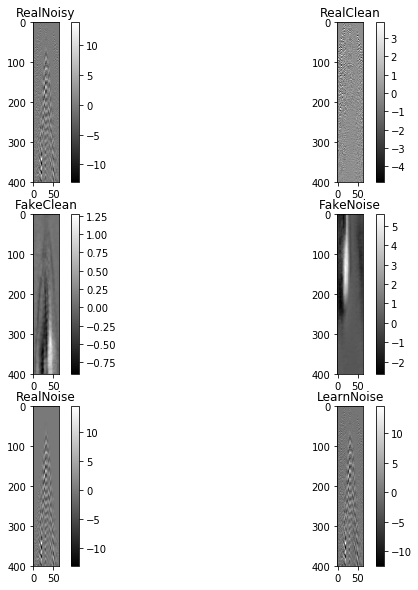

G loss of epoch 1/400 is 46.479915618896484
d loss of epoch 1/400 is 13.729304313659668


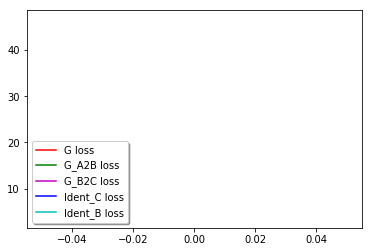

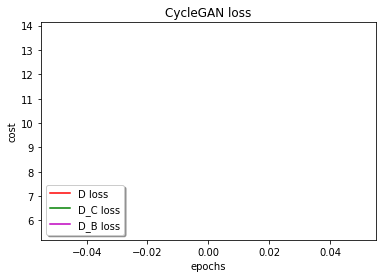

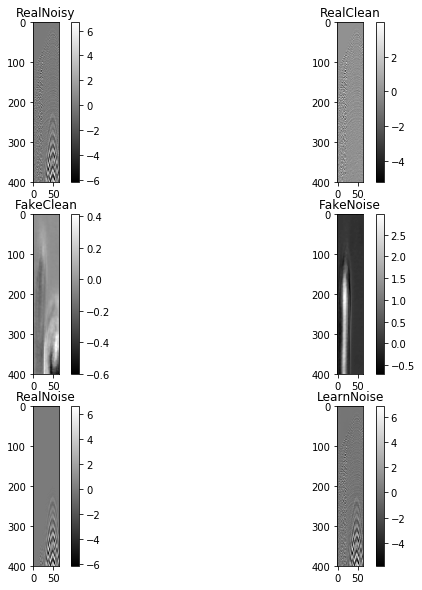

G loss of epoch 2/400 is 30.345157623291016
d loss of epoch 2/400 is 2.6245317459106445


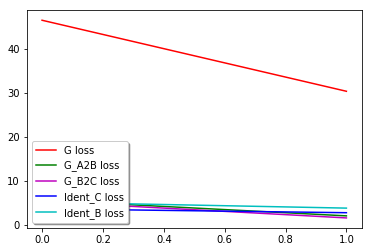

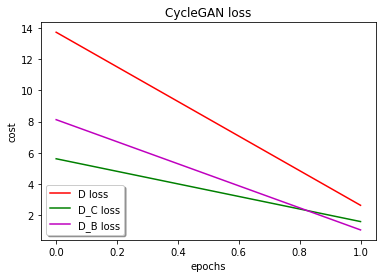

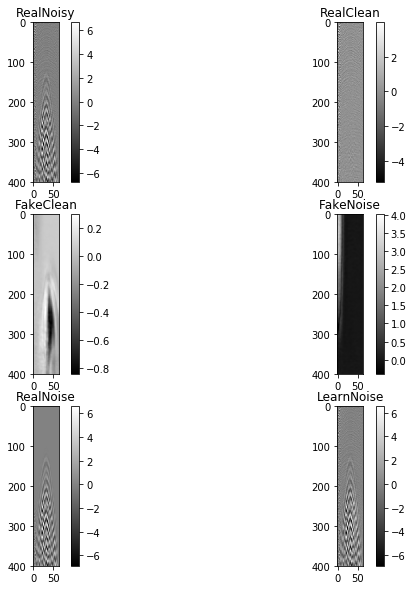

G loss of epoch 3/400 is 26.99408721923828
d loss of epoch 3/400 is 0.9799906015396118


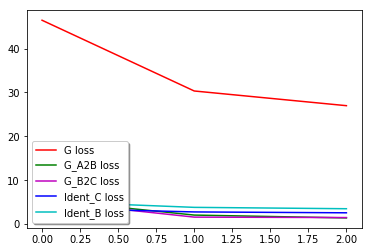

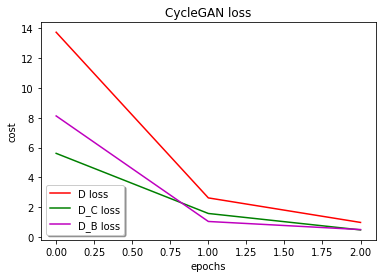

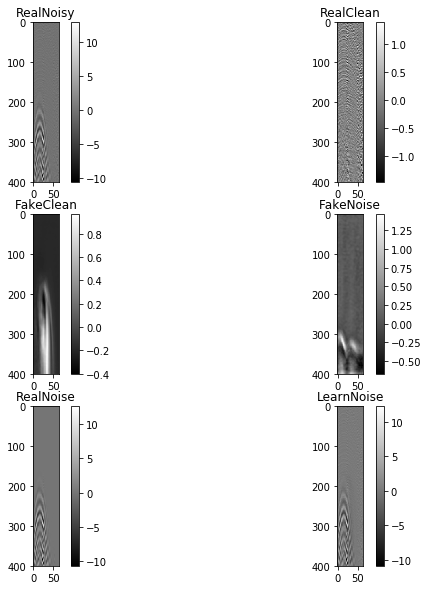

G loss of epoch 4/400 is 27.390666961669922
d loss of epoch 4/400 is 1.9405771493911743


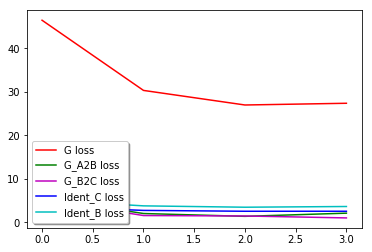

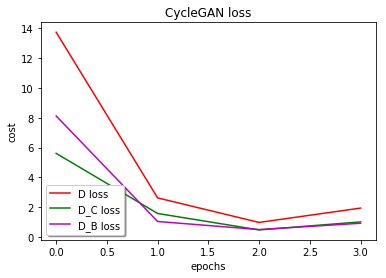

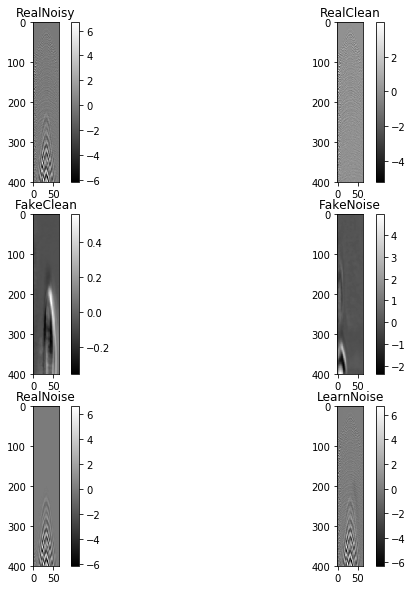

G loss of epoch 5/400 is 30.341747283935547
d loss of epoch 5/400 is 2.656620740890503


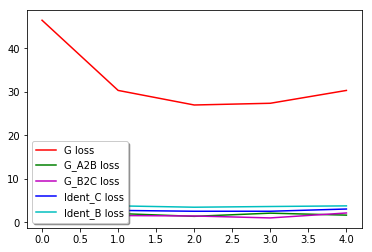

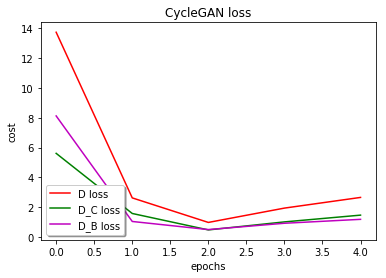

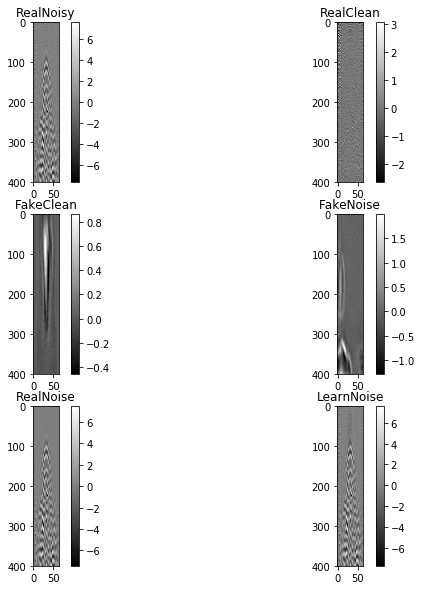

G loss of epoch 6/400 is 26.530651092529297
d loss of epoch 6/400 is 0.711311399936676


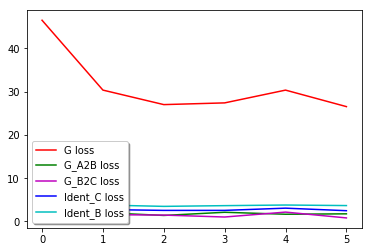

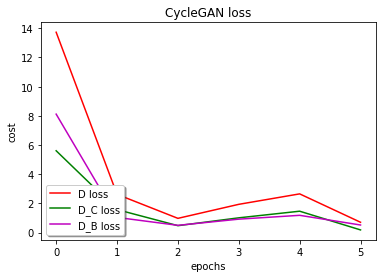

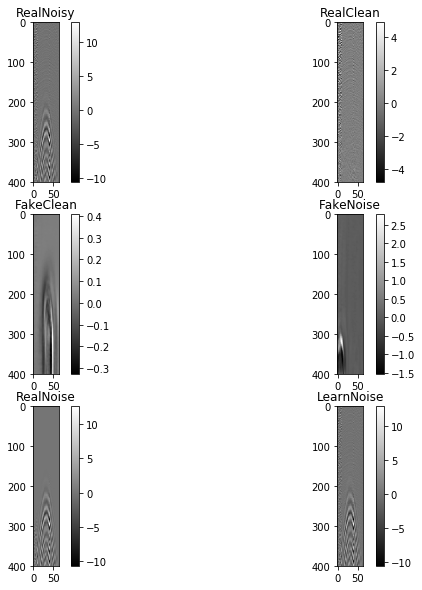

G loss of epoch 7/400 is 25.209020614624023
d loss of epoch 7/400 is 0.9143155813217163


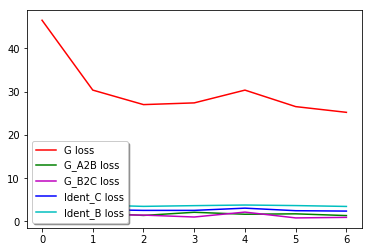

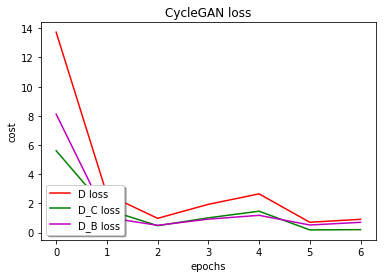

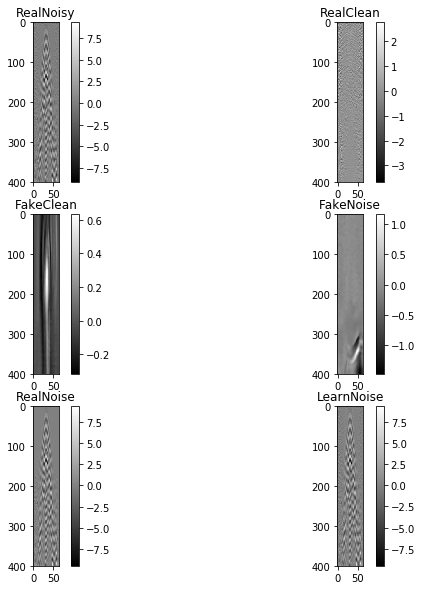

G loss of epoch 8/400 is 25.42625617980957
d loss of epoch 8/400 is 1.1685566902160645


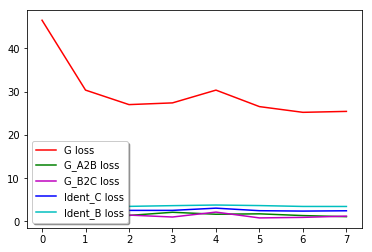

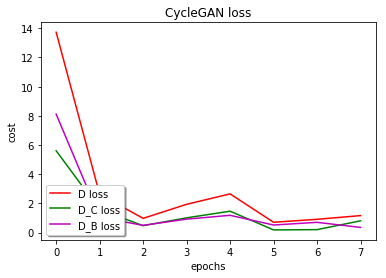

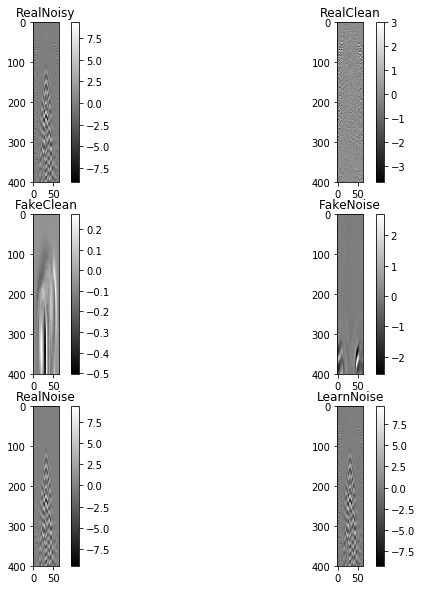

G loss of epoch 9/400 is 24.870670318603516
d loss of epoch 9/400 is 0.9096753001213074


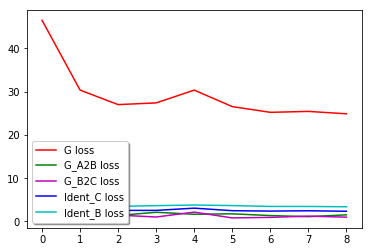

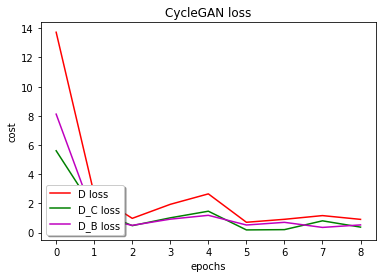

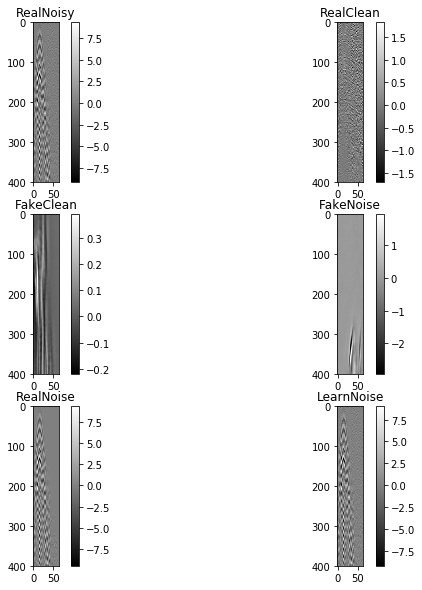

G loss of epoch 10/400 is 24.076404571533203
d loss of epoch 10/400 is 0.6057835221290588


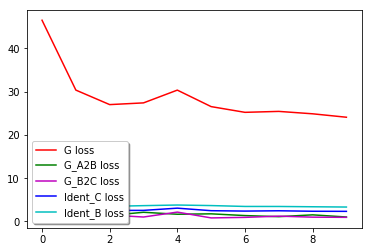

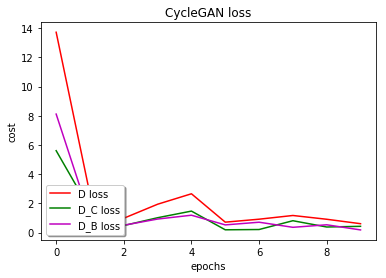

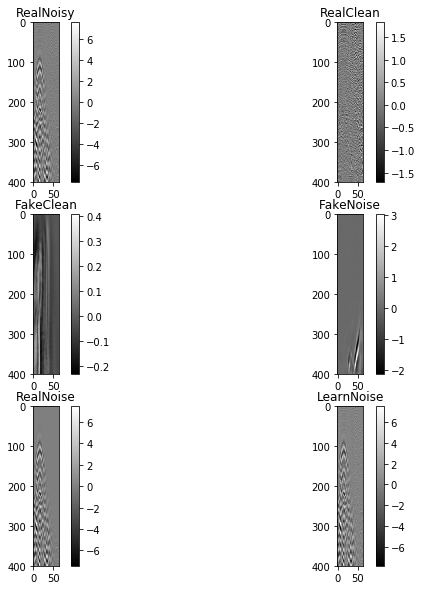

G loss of epoch 11/400 is 24.200210571289062
d loss of epoch 11/400 is 0.45842933654785156


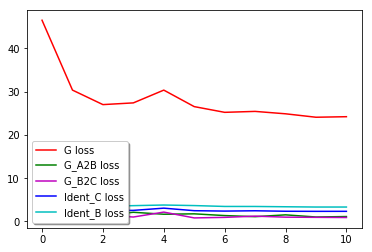

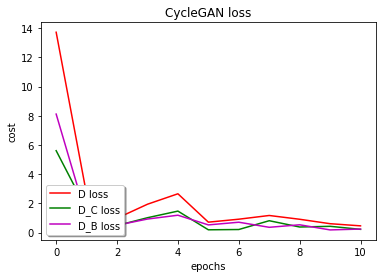

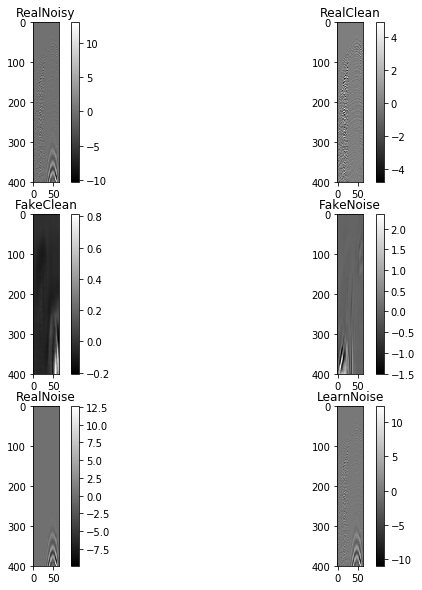

G loss of epoch 12/400 is 24.77024269104004
d loss of epoch 12/400 is 0.6991093158721924


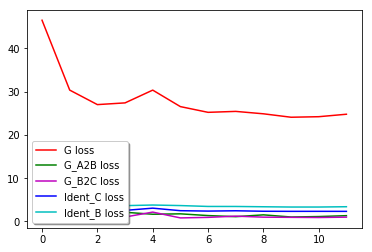

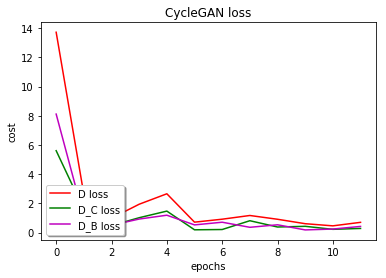

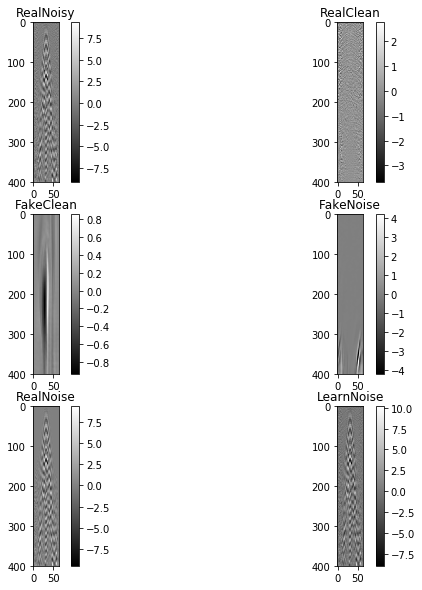

G loss of epoch 13/400 is 24.280162811279297
d loss of epoch 13/400 is 0.4571772515773773


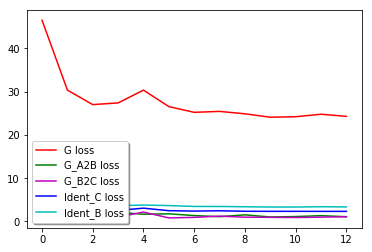

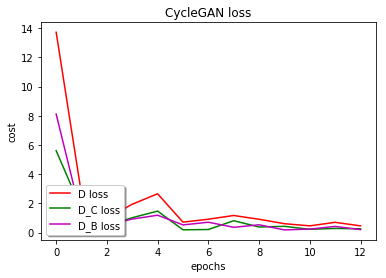

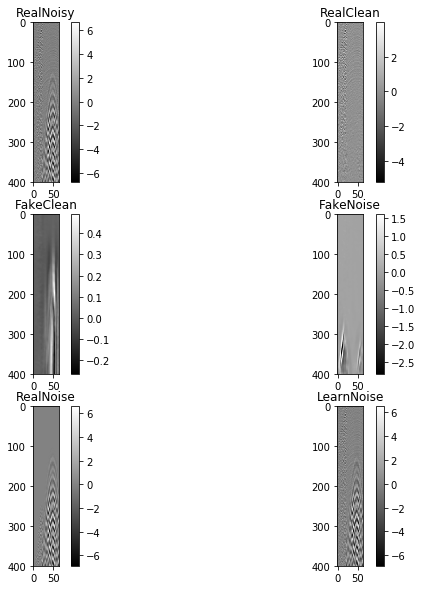

G loss of epoch 14/400 is 23.901674270629883
d loss of epoch 14/400 is 0.7522636651992798


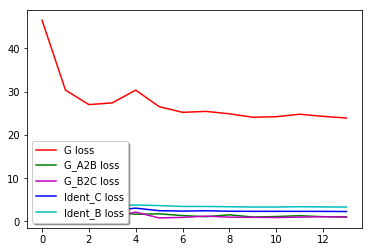

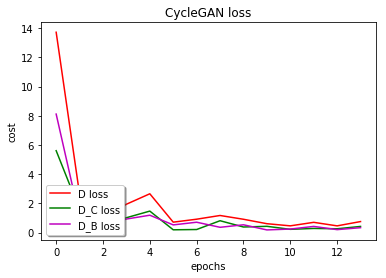

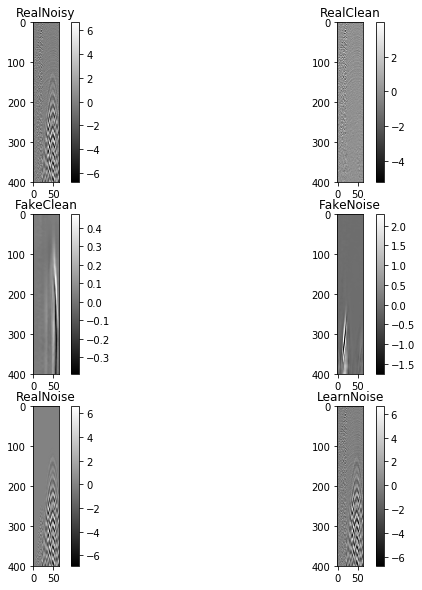

G loss of epoch 15/400 is 24.380714416503906
d loss of epoch 15/400 is 1.1085487604141235


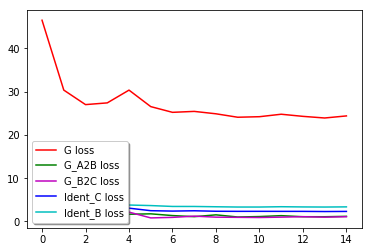

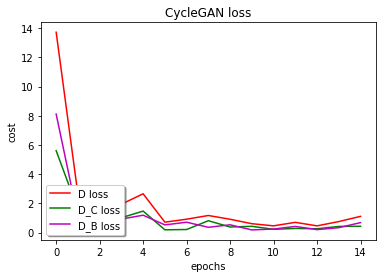

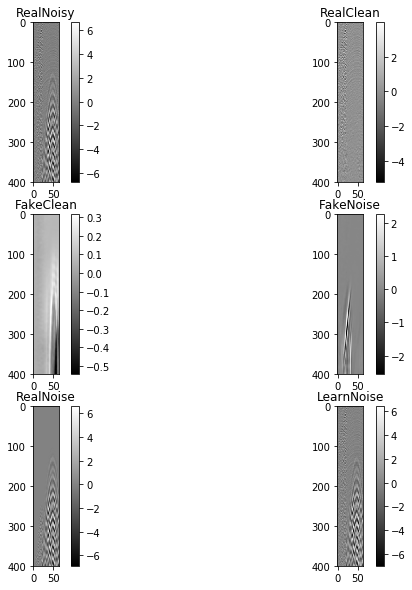

G loss of epoch 16/400 is 24.938268661499023
d loss of epoch 16/400 is 0.9268330335617065


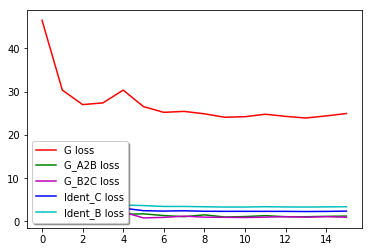

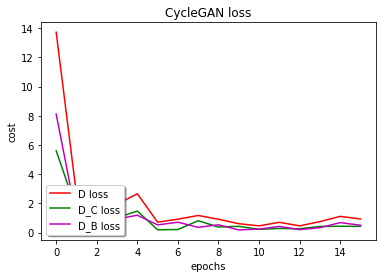

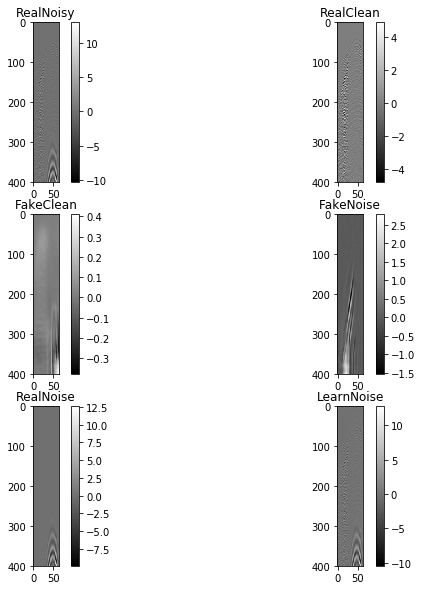

G loss of epoch 17/400 is 25.454484939575195
d loss of epoch 17/400 is 1.3676977157592773


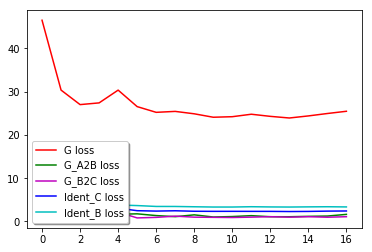

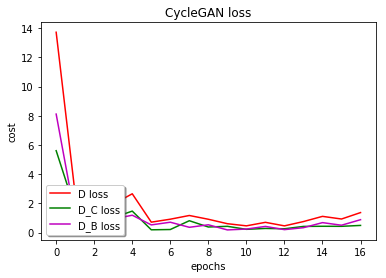

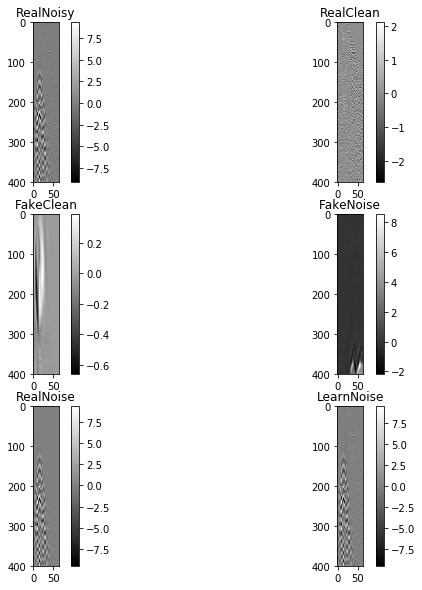

G loss of epoch 18/400 is 27.817623138427734
d loss of epoch 18/400 is 2.685701847076416


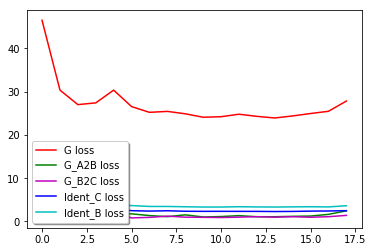

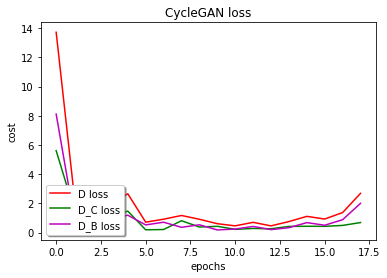

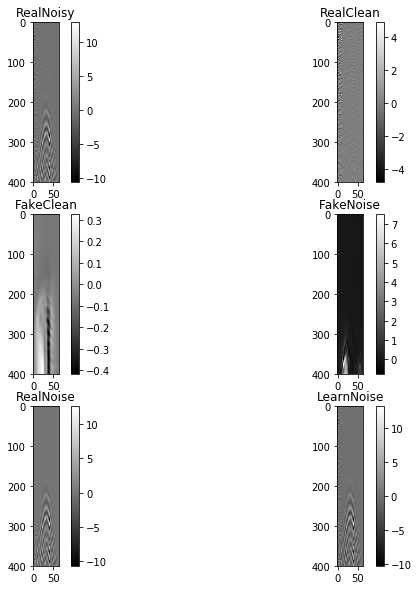

G loss of epoch 19/400 is 27.131086349487305
d loss of epoch 19/400 is 3.2228446006774902


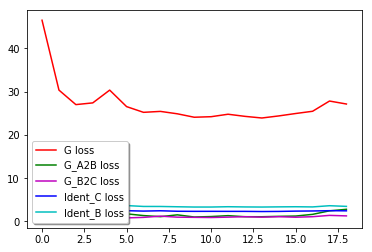

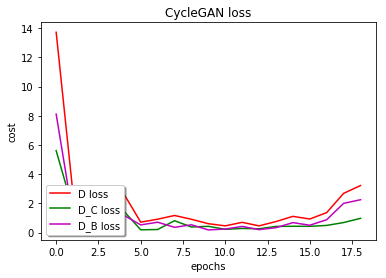

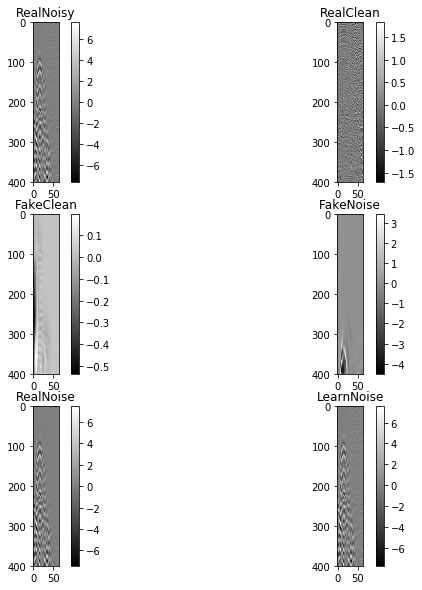

G loss of epoch 20/400 is 26.51483154296875
d loss of epoch 20/400 is 1.202878713607788


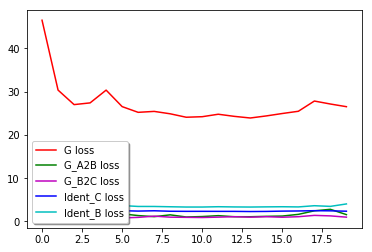

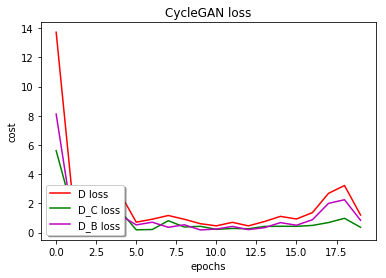

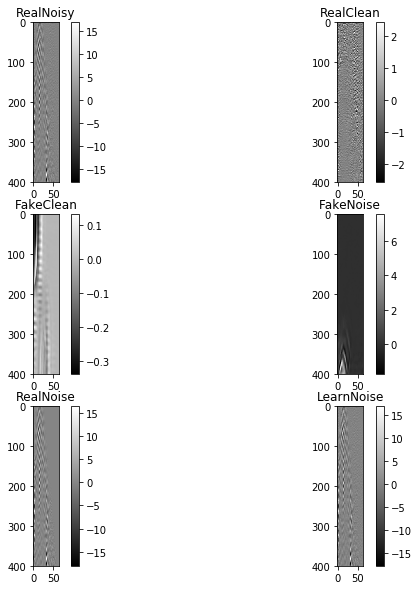

G loss of epoch 21/400 is 24.003246307373047
d loss of epoch 21/400 is 0.6985996961593628


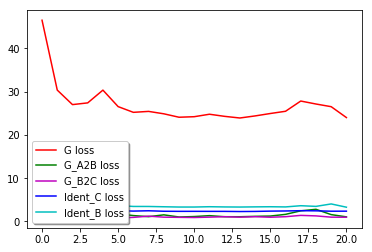

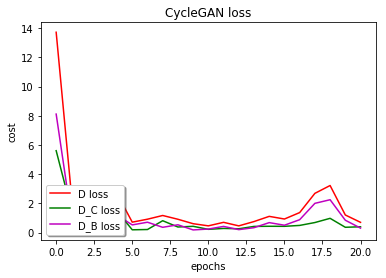

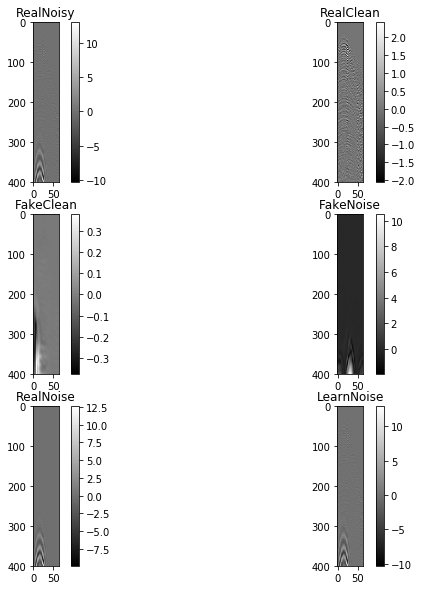

G loss of epoch 22/400 is 24.297897338867188
d loss of epoch 22/400 is 0.7050107717514038


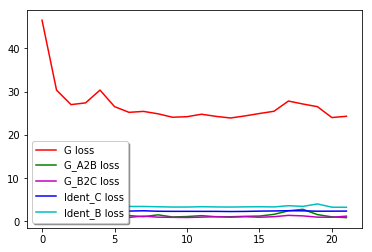

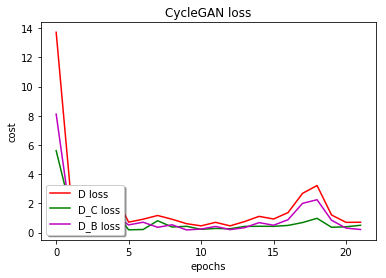

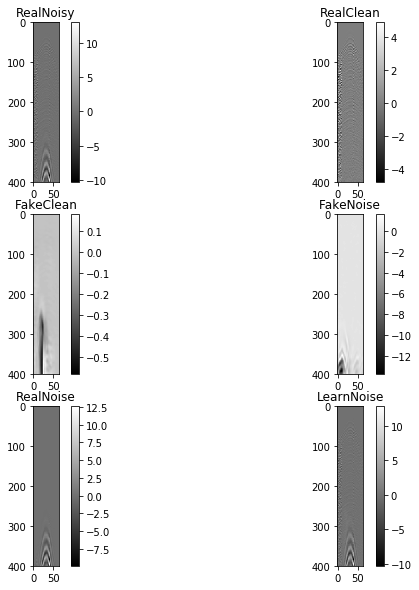

G loss of epoch 23/400 is 24.563390731811523
d loss of epoch 23/400 is 0.9092667102813721


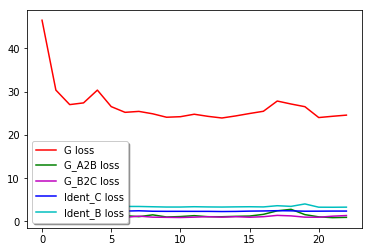

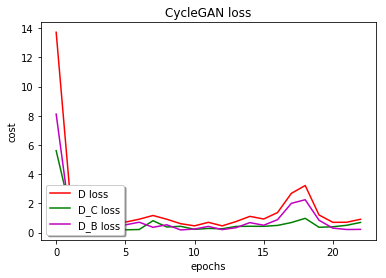

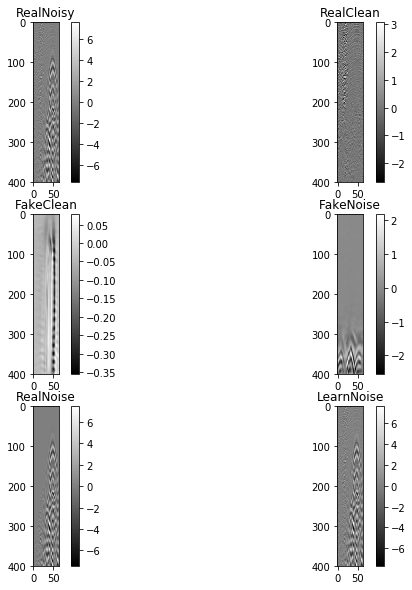

G loss of epoch 24/400 is 23.62592315673828
d loss of epoch 24/400 is 0.559080958366394


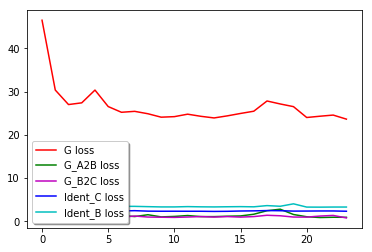

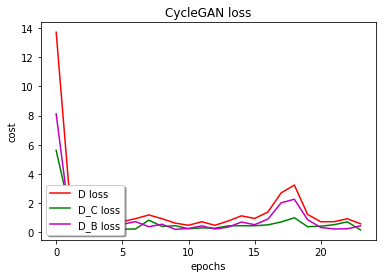

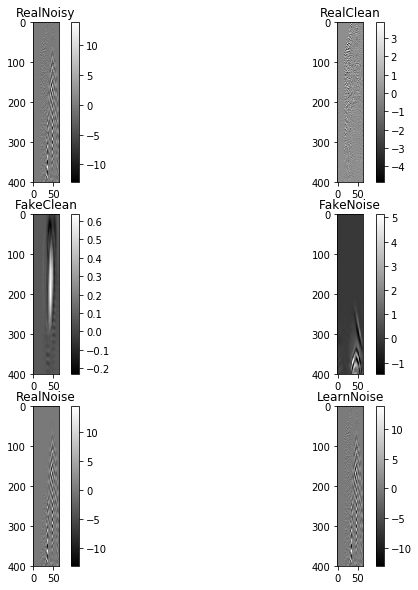

G loss of epoch 25/400 is 24.009613037109375
d loss of epoch 25/400 is 0.5479041337966919


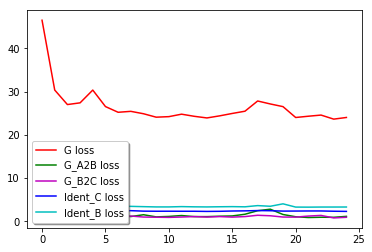

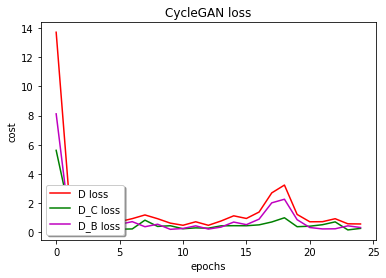

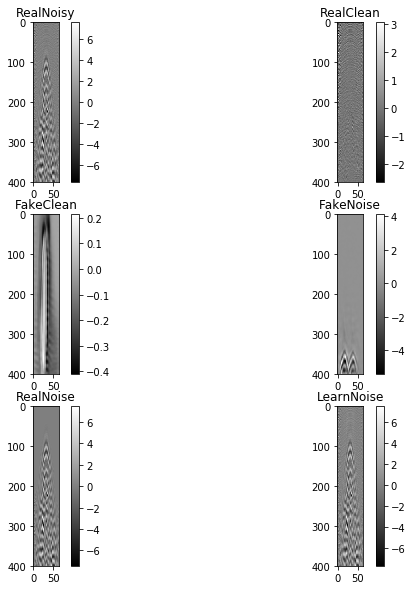

G loss of epoch 26/400 is 24.50105857849121
d loss of epoch 26/400 is 0.7168241739273071


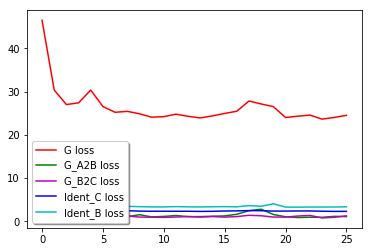

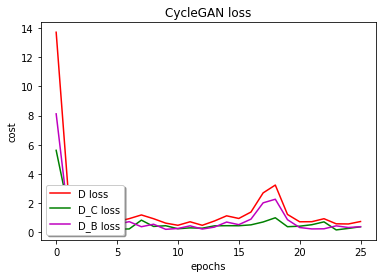

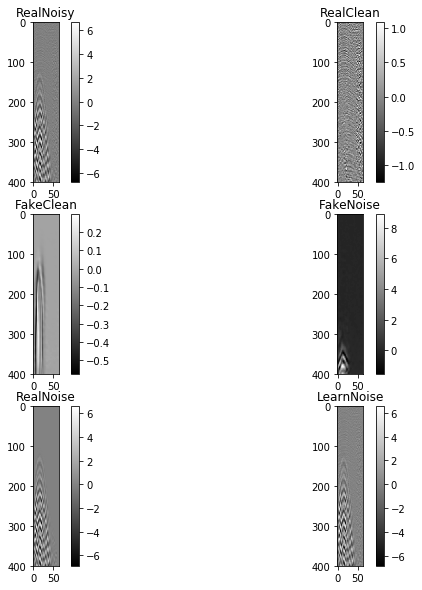

G loss of epoch 27/400 is 24.052032470703125
d loss of epoch 27/400 is 0.5263344049453735


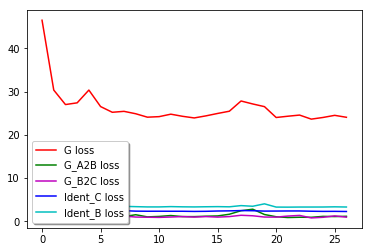

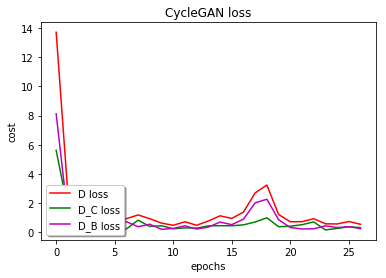

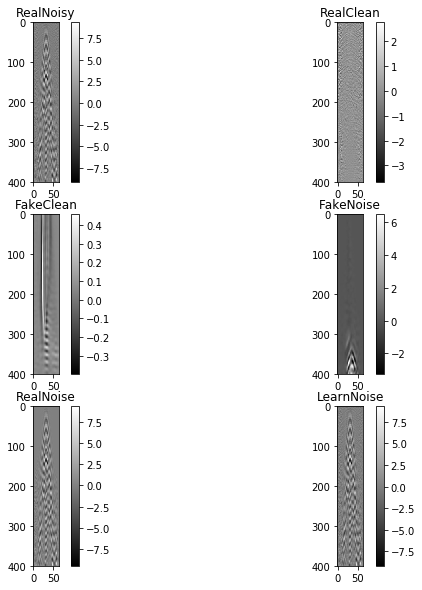

G loss of epoch 28/400 is 23.664430618286133
d loss of epoch 28/400 is 0.47939610481262207


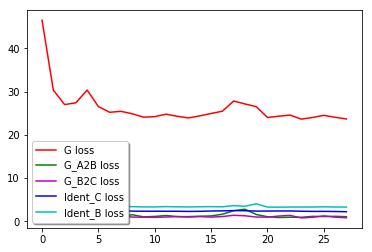

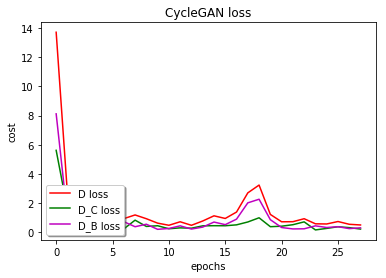

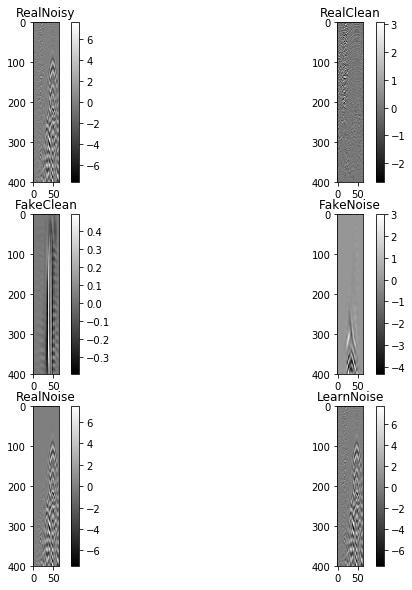

G loss of epoch 29/400 is 24.127424240112305
d loss of epoch 29/400 is 0.8590442538261414


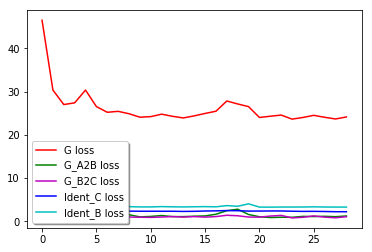

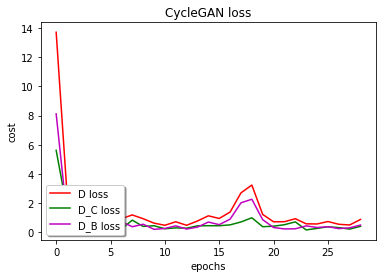

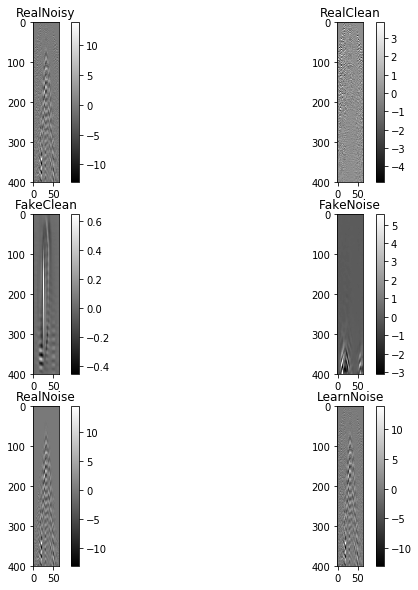

G loss of epoch 30/400 is 23.8226318359375
d loss of epoch 30/400 is 0.5211426615715027


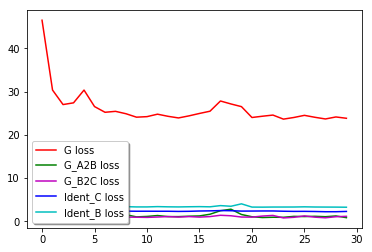

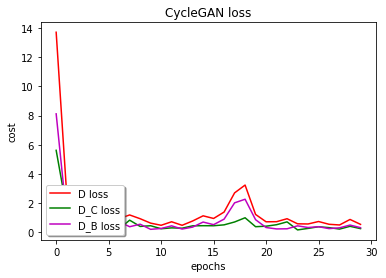

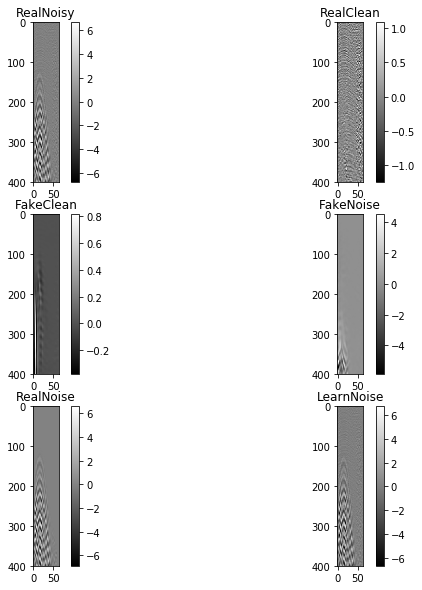

G loss of epoch 31/400 is 24.15489387512207
d loss of epoch 31/400 is 0.6097792983055115


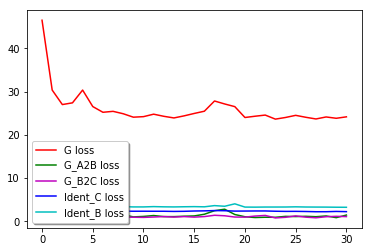

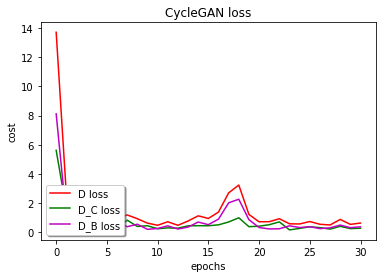

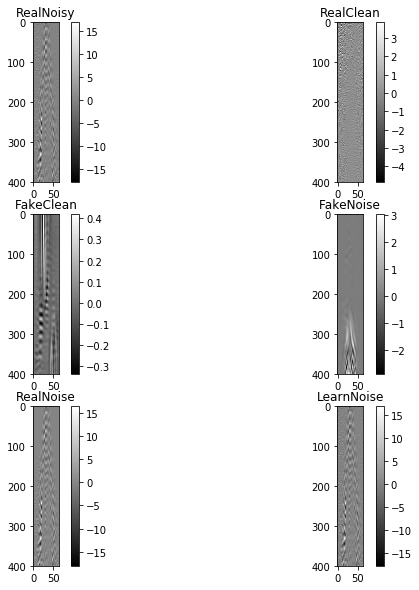

G loss of epoch 32/400 is 24.082645416259766
d loss of epoch 32/400 is 0.8001370429992676


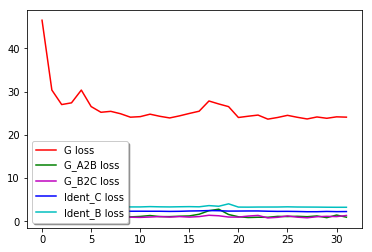

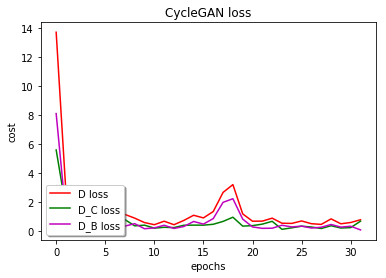

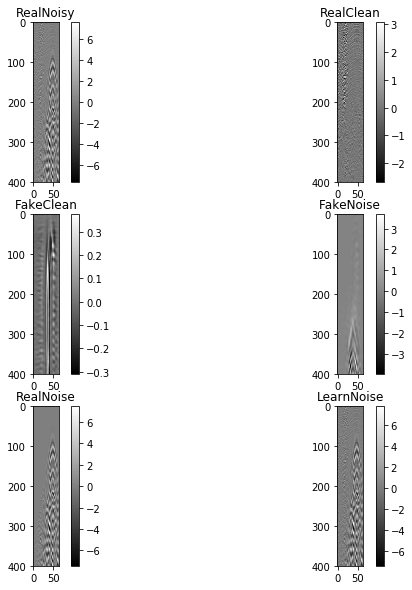

G loss of epoch 33/400 is 23.531166076660156
d loss of epoch 33/400 is 0.5306494235992432


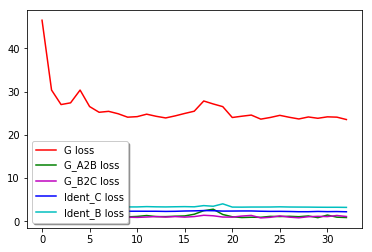

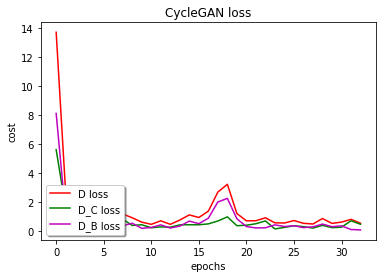

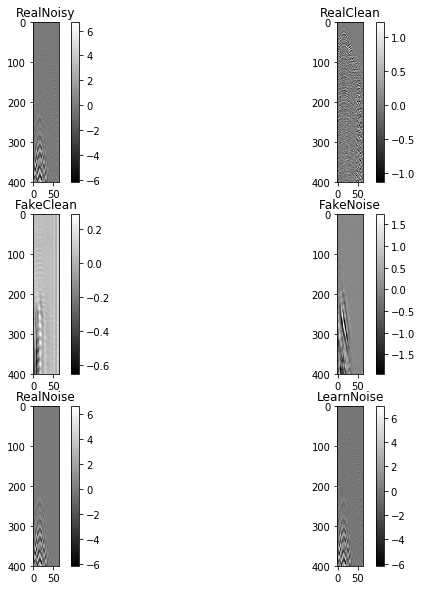

G loss of epoch 34/400 is 24.259347915649414
d loss of epoch 34/400 is 0.9192623496055603


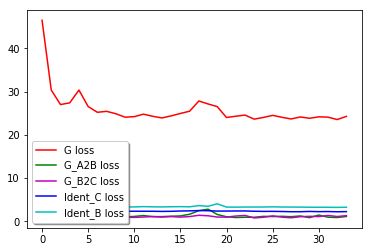

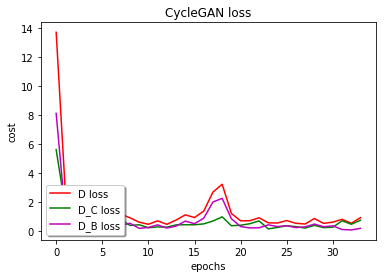

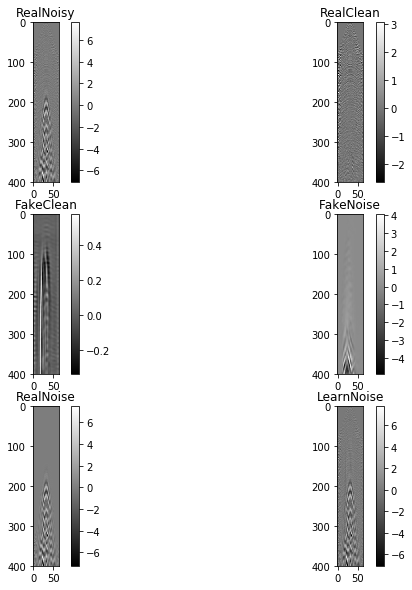

G loss of epoch 35/400 is 23.446321487426758
d loss of epoch 35/400 is 0.9607594609260559


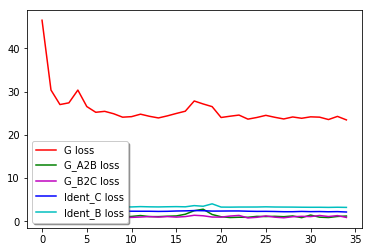

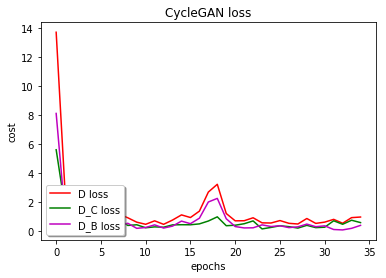

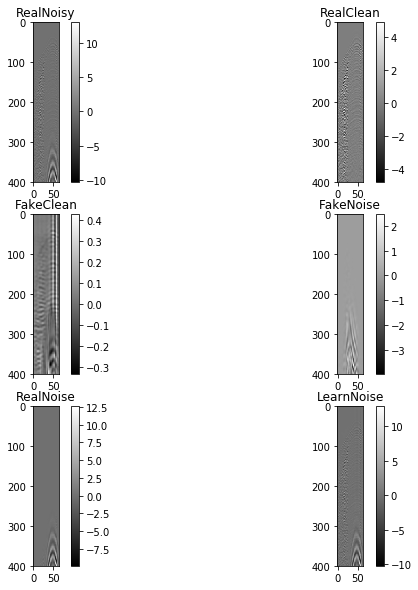

G loss of epoch 36/400 is 24.009260177612305
d loss of epoch 36/400 is 0.9372345805168152


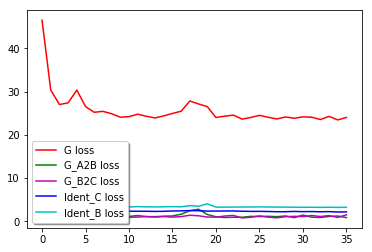

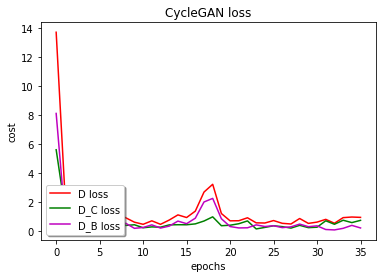

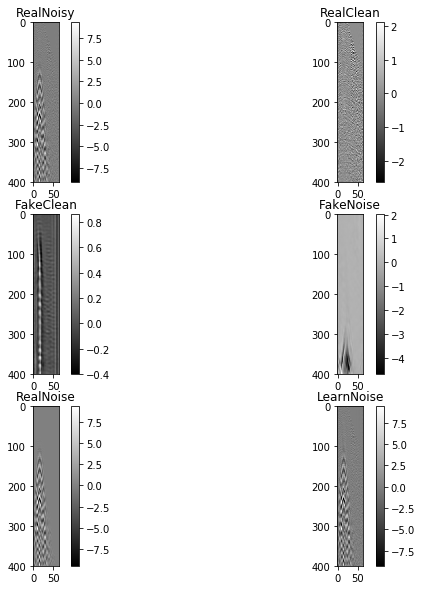

G loss of epoch 37/400 is 26.651111602783203
d loss of epoch 37/400 is 2.4198977947235107


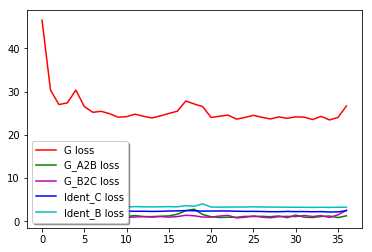

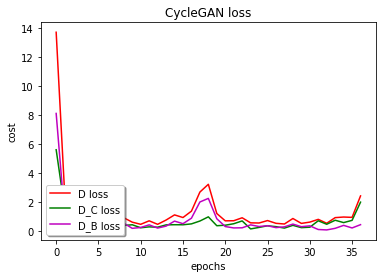

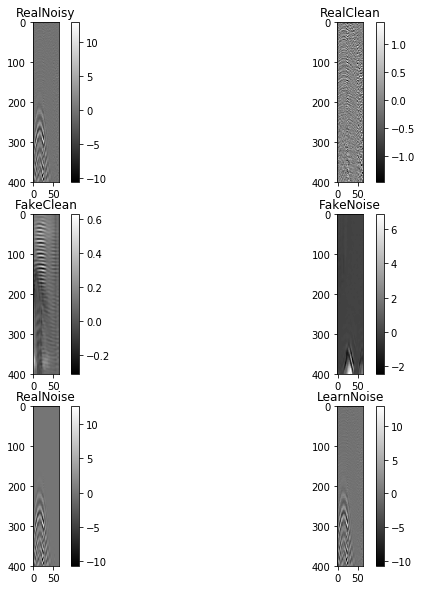

G loss of epoch 38/400 is 25.995819091796875
d loss of epoch 38/400 is 1.8016910552978516


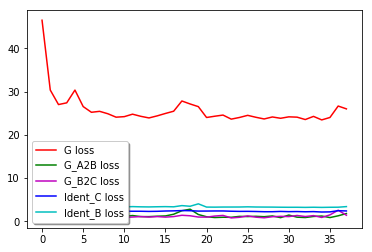

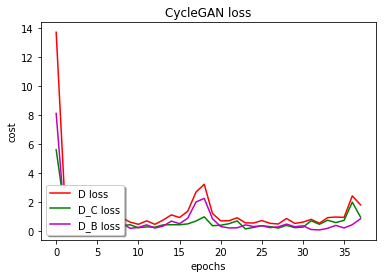

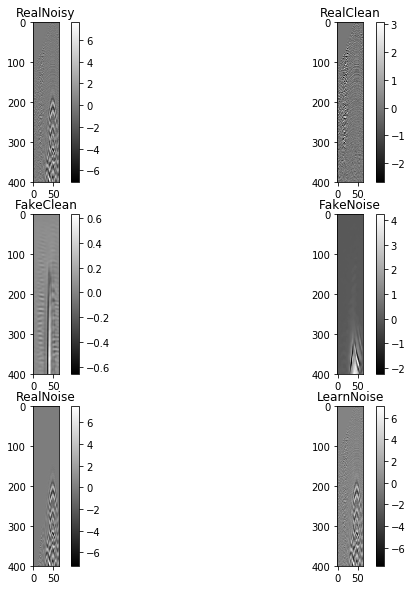

G loss of epoch 39/400 is 23.894729614257812
d loss of epoch 39/400 is 0.7763988375663757


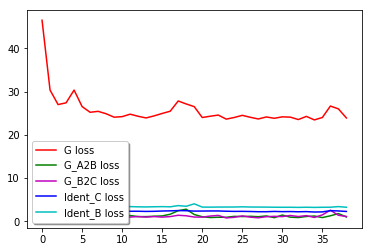

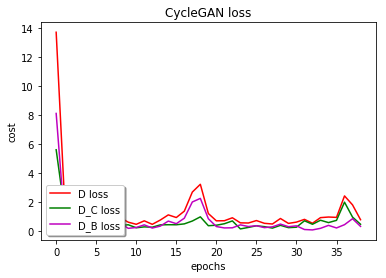

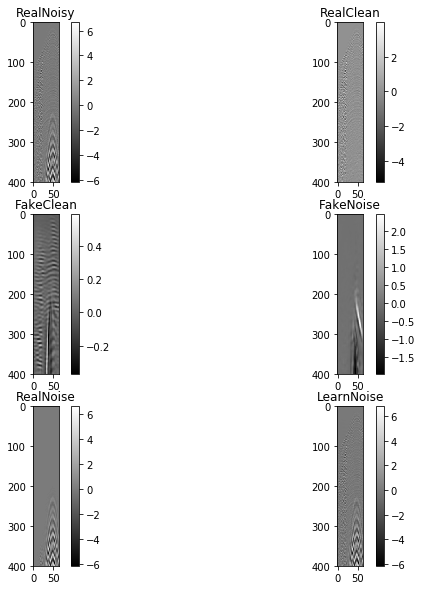

G loss of epoch 40/400 is 23.403038024902344
d loss of epoch 40/400 is 0.5769140720367432


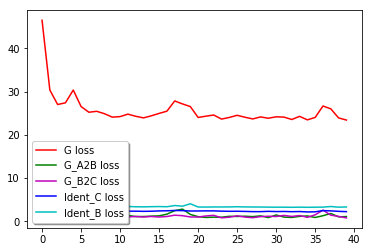

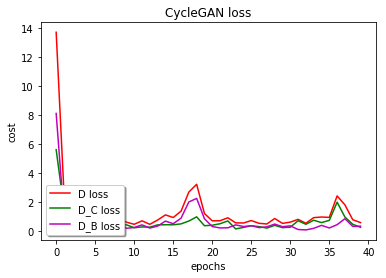

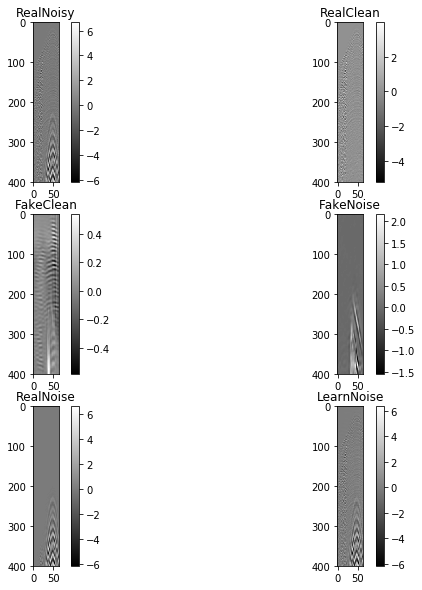

G loss of epoch 41/400 is 23.77156639099121
d loss of epoch 41/400 is 0.6070783734321594


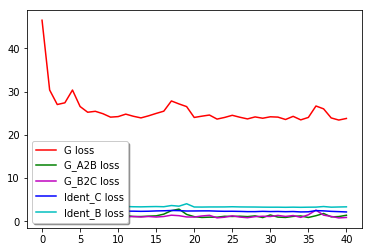

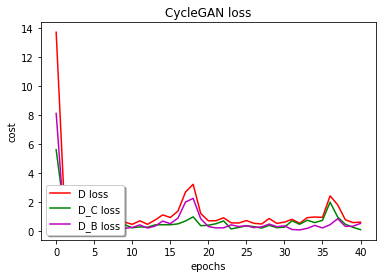

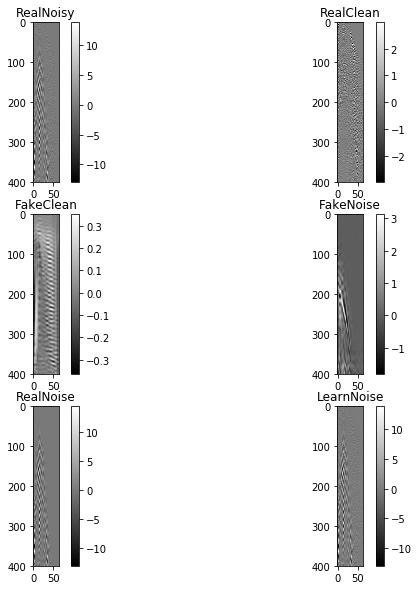

G loss of epoch 42/400 is 23.87686538696289
d loss of epoch 42/400 is 0.748587429523468


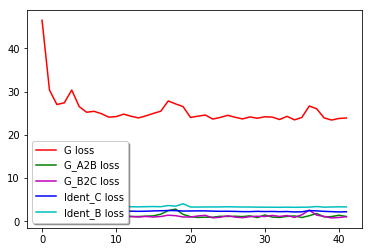

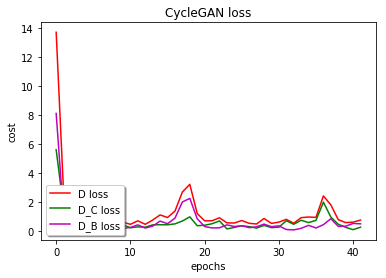

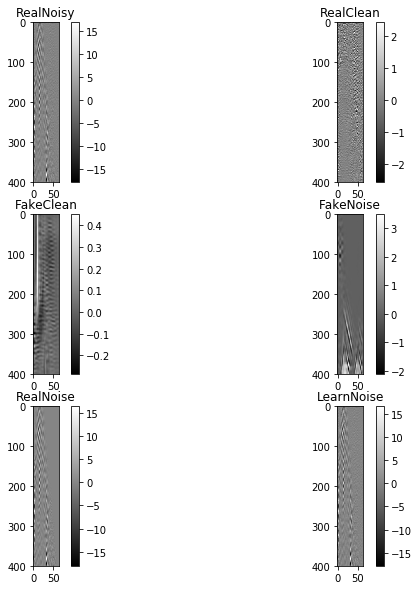

G loss of epoch 43/400 is 24.222766876220703
d loss of epoch 43/400 is 1.1561516523361206


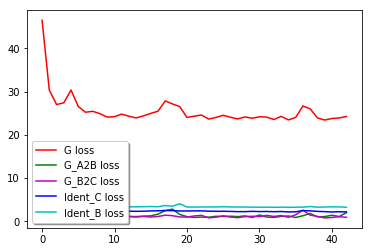

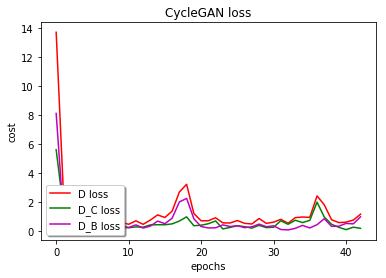

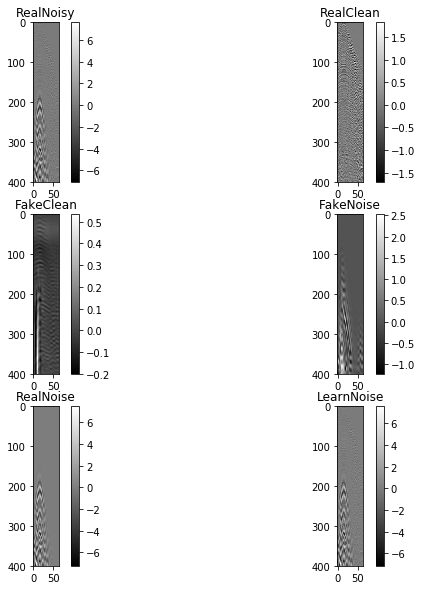

G loss of epoch 44/400 is 23.45758819580078
d loss of epoch 44/400 is 0.40580764412879944


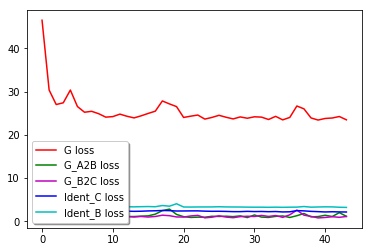

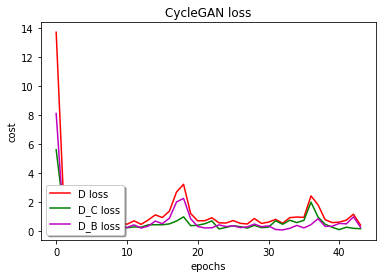

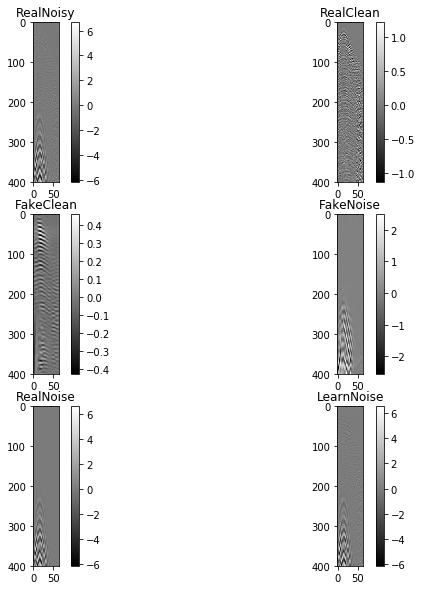

G loss of epoch 45/400 is 23.126901626586914
d loss of epoch 45/400 is 0.23377248644828796


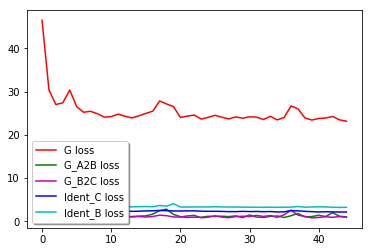

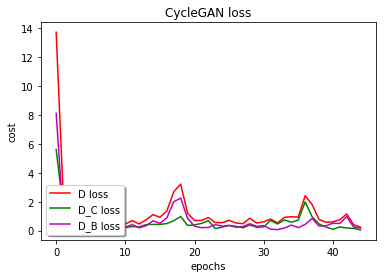

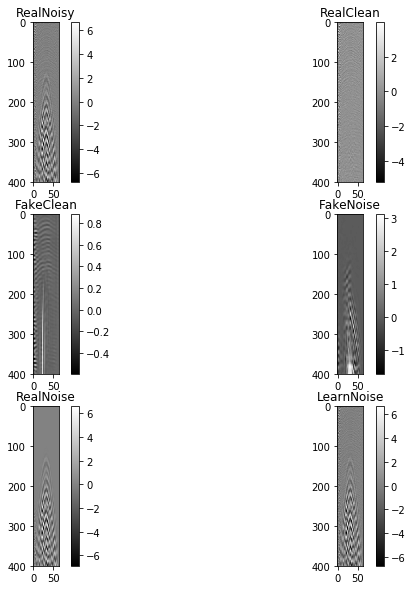

G loss of epoch 46/400 is 22.966297149658203
d loss of epoch 46/400 is 0.1655307412147522


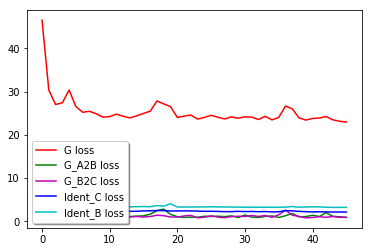

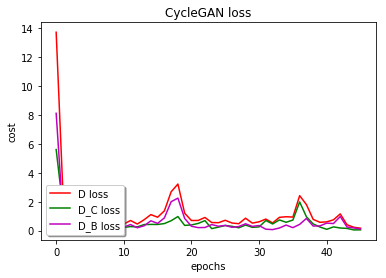

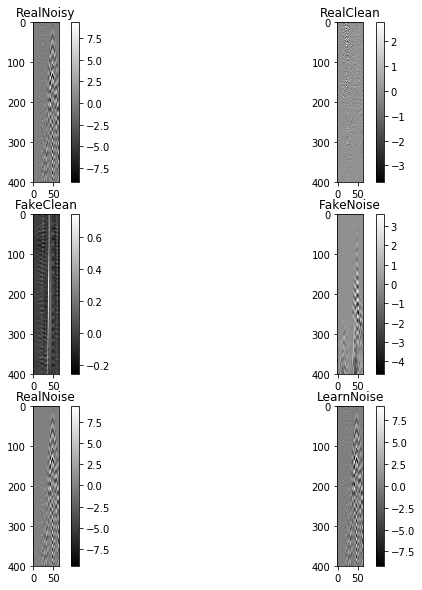

In [ ]:
###### Training ######
lossg=[]
lossd=[]
lossga2b=[]
lossgb2c=[]
losscabc=[]
#losscbab=[]
lossdc=[]
lossdb=[]
fakeC=[]
inputA=[]
inputB=[]
#cyclA=[]
#cyclB=[]
fakeB=[]
lossic=[]
lossib=[]
learnC=[]
realC=[]
for epoch in range(0, 400):
    batch_size=1
    num_minibatches = int(inputsori['image_i'].shape[0] / batch_size) # number of minibatches of size minibatch_size in the train set
    
    minibatches = random_mini_batches(inputsori['image_i'], inputsori['image_j'], inputsori['image_k'], batch_size)
    i=0
    lossG=0
    lossD=0
    lossGANA2B=0
    lossGANB2C=0
    losscycleABC=0
    #losscycleBAB=0
    lossDC=0
    lossDB=0
    lossiC=0
    lossiB=0
    #rate=10
    for minibatch in minibatches:
        

        # Select a minibatch
        (minibatch_X, minibatch_Y,minibatch_Z) = minibatch
        
        minibatch_X=np.transpose(minibatch_X,(0,3,1,2))
        minibatch_Y=np.transpose(minibatch_Y,(0,3,1,2))
        minibatch_Z=np.transpose(minibatch_Z,(0,3,1,2))
        
        X=torch.FloatTensor(minibatch_X)
        Y=torch.FloatTensor(minibatch_Y)
        Z=torch.FloatTensor(minibatch_Z)
        # Set model input
        real_A = Variable(input_A.copy_(X))
        real_B = Variable(input_B.copy_(Y))
        real_C = Variable(input_C.copy_(Z))
        
        ###### Generators A2B and B2A ######
        optimizer_G.zero_grad()

        # Identity loss
        # G_A2B(B) should equal B if real B is fed
        same_B = netG_A2B(real_B)
        loss_identity_B = criterion_identity(same_B, real_B)*5.0
        # G_B2A(A) should equal A if real A is fed
        same_C = netG_B2C(real_C)
        loss_identity_C = criterion_identity(same_C, real_C)*5.0
        
        # GAN loss
        fake_B = netG_A2B(real_A)
        pred_fake = netD_B(fake_B)
        loss_GAN_A2B = criterion_GAN(pred_fake, target_real)
        loss_G_B_L1 = criterion_identity(fake_B,real_B)*10.0
        fake_C = netG_B2C(real_B)
        pred_fake = netD_C(fake_C)
        loss_GAN_B2C = criterion_GAN(pred_fake, target_real)
        loss_G_C_L1 = criterion_identity(fake_C,real_C)*10.0
        
        # Cycle loss (clean->ground)
        recovered_C = netG_B2C(fake_B)
        loss_cycle_ABC = criterion_cycle(recovered_C, real_C)*10.0

        #recovered_B = netG_A2B(fake_A)
        #loss_cycle_BAB = criterion_cycle(recovered_B, real_B)*10.0
        
        #Self Distance Loss
        
        
        #A_half_1, A_half_2 = torch.chunk(real_A, 2, dim=2)
        #B_half_1, B_half_2 = torch.chunk(real_B, 2, dim=2)
        #AB_half_1, AB_half_2 = torch.chunk(fake_B, 2, dim=2)
        #BA_half_1, BA_half_2 = torch.chunk(fake_A, 2, dim=2)
        
        #distance_in_A = torch.mean(torch.abs(A_half_1 -A_half_2 ))
        #distance_in_AB = torch.mean(torch.abs(AB_half_1 -AB_half_2 ))
        #distance_in_B = torch.mean(torch.abs(B_half_1 - B_half_2))
        #distance_in_BA = torch.mean(torch.abs(BA_half_1 - BA_half_2))
        
        

        #loss_Self_A_L1=torch.abs(distance_in_A - distance_in_AB)
        #loss_Self_B_L1=torch.abs(distance_in_B - distance_in_BA)
        
        
        
        fakeB.append(fake_B[0].data.cpu().float().numpy()*s2+m2)
        inputA.append(real_A[0].data.cpu().float().numpy()*s1+m1)
        inputB.append(real_B[0].data.cpu().float().numpy()*s3+m3)
        fakeC.append(fake_C[0].data.cpu().float().numpy()*s1+m1)
        realC.append(real_C[0].data.cpu().float().numpy()*s3+m3)
        learnC.append(real_A[0].data.cpu().float().numpy()*s1+m1-fake_B[0].data.cpu().float().numpy()*s2+m2)
        
        if i==10:
            fig, axarr = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
            for col in range (2):
                for row in range (3):
                    ax = axarr[row, col]
                    if (col==0 and row==0):
                        im = np.transpose(real_A[0].data.cpu().float().numpy()[0,:,:]*s1+m1)
                        ax.set_title('RealNoisy')
                    elif (row==0 and col==1):
                        im = np.transpose(real_B[0].data.cpu().float().numpy()[0,:,:]*s2+m2)
                        ax.set_title('RealClean')
                    elif (row==1 and col==0):
                        im = np.transpose(fake_B[0].data.cpu().float().numpy()[0,:,:]*s2+m2)
                        ax.set_title('FakeClean')
                    elif (row==1 and col==1):
                        im = np.transpose(fake_C[0].data.cpu().float().numpy()[0,:,:]*s1+m1)
                        ax.set_title('FakeNoise')
                    elif (row==2 and col==0):
                        im = np.transpose(real_C[0].data.cpu().float().numpy()[0,:,:]*s3+m3)
                        ax.set_title('RealNoise')
                    elif (row==2 and col==1):
                        im = np.transpose(real_A[0].data.cpu().float().numpy()[0,:,:]*s1+m1-fake_B[0].data.cpu().float().numpy()[0,:,:]*s2+m2)
                        ax.set_title('LearnNoise')
                    pcm = ax.imshow(im,cmap="gray")
                    fig.colorbar(pcm, ax=ax)
                    
            plt.show()
                    
        

        # Total loss
        loss_G = loss_identity_C + loss_identity_B + loss_GAN_A2B + loss_GAN_B2C + loss_G_B_L1 + loss_G_C_L1 + loss_cycle_ABC
        loss_G.backward()
        
        optimizer_G.step()
        ###################################

        ###### Discriminator A ######
        optimizer_D_C.zero_grad()

        # Real loss
        pred_real = netD_C(real_C)
        loss_D_real = criterion_GAN(pred_real, target_real)

        # Fake loss
        fake_C = fake_C_buffer.push_and_pop(fake_C)
        pred_fake = netD_C(fake_C.detach())
        loss_D_fake = criterion_GAN(pred_fake, target_fake)

        # Total loss
        loss_D_C = (loss_D_real + loss_D_fake)*0.5
        loss_D_C.backward()

        optimizer_D_C.step()
        ###################################

        ###### Discriminator B ######
        optimizer_D_B.zero_grad()

        # Real loss
        pred_real = netD_B(real_B)
        loss_D_real = criterion_GAN(pred_real, target_real)
        
        # Fake loss
        fake_B = fake_B_buffer.push_and_pop(fake_B)
        pred_fake = netD_B(fake_B.detach())
        loss_D_fake = criterion_GAN(pred_fake, target_fake)

        # Total loss
        loss_D_B = (loss_D_real + loss_D_fake)*0.5
        loss_D_B.backward()

        optimizer_D_B.step()
        ###################################
        
        #print("G_A loss of batch {}/{} is {}".format(i+1, num_minibatches, loss_GAN_A2B.data))
        #print("d_C loss of batch {}/{} is {}".format(i+1, num_minibatches, loss_D_C.data))
        #print("G_C loss of batch {}/{} is {}".format(i+1, num_minibatches, loss_GAN_B2C.data))
        #print("d_B loss of batch {}/{} is {}".format(i+1, num_minibatches, loss_D_B.data))
        lossG=lossG+loss_G.data
        lossD=lossD+loss_D_C.data + loss_D_B.data
        lossDC=lossDC+loss_D_C.data
        lossDB=lossDB+loss_D_B.data
        lossGANA2B=lossGANA2B+loss_GAN_A2B.data
        lossGANB2C=lossGANB2C+loss_GAN_B2C.data
        losscycleABC=losscycleABC+loss_cycle_ABC.data
        #losscycleBAB=losscycleBAB+loss_cycle_BAB.data
        lossiC=lossiC+loss_identity_C.data
        lossiB=lossiB+loss_identity_B.data
        i=i+1
        
        del loss_G
        del loss_D_real
        del loss_D_C
        del loss_D_B
        del loss_identity_C
        del loss_identity_B
        del loss_GAN_A2B
        del loss_GAN_B2C
        del real_A
        del real_B
        del real_C
        del X
        del Y
        del Z
        del same_B
        del same_C
        del fake_B
        del pred_fake
        del fake_C
        del recovered_C
        #del recovered_B
        del pred_real
        del loss_D_fake
        del loss_cycle_ABC
        #del loss_cycle_BAB
        #del loss_Self_A_L1
        #del loss_Self_B_L1
        #del A_half_1
        #del A_half_2
        #del B_half_1
        #del B_half_2
        #del AB_half_1
        #del AB_half_2
        #del BA_half_1
        #del BA_half_2
        
        
        torch.cuda.empty_cache()
        
    lossG_avg=lossG/num_minibatches
    lossD_avg=lossD/num_minibatches
    lossDC_avg=lossDC/num_minibatches
    lossDB_avg=lossDB/num_minibatches
    lossGANA2B_avg=lossGANA2B/num_minibatches
    lossGANB2C_avg=lossGANB2C/num_minibatches
    losscycleABC_avg=losscycleABC/num_minibatches
    #losscycleBAB_avg=losscycleBAB/num_minibatches
    lossiC_avg=lossiC/num_minibatches
    lossiB_avg=lossiB/num_minibatches
    
    print("G loss of epoch {}/{} is {}".format(epoch+1, 400, lossG_avg))
    print("d loss of epoch {}/{} is {}".format(epoch+1, 400, lossD_avg))
    
    lossg.append(lossG_avg)
    lossd.append(lossD_avg)
    lossdc.append(lossDC_avg)
    lossdb.append(lossDB_avg)
    lossga2b.append(lossGANA2B_avg)
    lossgb2c.append(lossGANB2C_avg)
    losscabc.append(losscycleABC_avg)
    #losscbab.append(losscycleBAB_avg)
    lossic.append(lossiC_avg)
    lossib.append(lossiB_avg)
    
    # plot the cost
    fig1, ax1 = plt.subplots()
    ax1.plot(np.squeeze(lossg),'r', label='G loss')
    ax1.plot(np.squeeze(lossga2b),'g', label='G_A2B loss')
    ax1.plot(np.squeeze(lossgb2c),'m', label='G_B2C loss')
    #ax1.plot(np.squeeze(losscaba),'y', label='G_ABA loss')
    #ax1.plot(np.squeeze(losscbab),'k', label='G_BAB loss')
    ax1.plot(np.squeeze(lossic),'b', label='Ident_C loss')
    ax1.plot(np.squeeze(lossib),'c', label='Ident_B loss')
    legend1 = ax1.legend(loc='lower left', shadow=True)
    fig2, ax2 = plt.subplots()                    
    ax2.plot(np.squeeze(lossd),'r', label='D loss')
    ax2.plot(np.squeeze(lossdc),'g', label='D_C loss')
    ax2.plot(np.squeeze(lossdb),'m', label='D_B loss')
    legend2 = ax2.legend(loc='lower left', shadow=True)
    
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.title("CycleGAN loss")
    plt.show()
    
    # Update learning rates
    lr_scheduler_G.step()
    lr_scheduler_D_C.step()
    lr_scheduler_D_B.step()

    # Save models checkpoints
    torch.save(netG_A2B.state_dict(), './output/netG_A2B_4.pth')
    torch.save(netG_B2C.state_dict(), './output/netG_B2C_4.pth')
    torch.save(netD_C.state_dict(), './output/netD_C_4.pth')
    torch.save(netD_B.state_dict(), './output/netD_B_4.pth')
    torch.cuda.empty_cache()
###################################

In [19]:
###### Definition of variables ######
import sys
import torch
# Networks
netG_A2B = Generator(1, 1)
netG_B2A = Generator(1, 1)

netG_A2B.cuda()
netG_B2A.cuda()

# Load state dicts
netG_A2B.load_state_dict(torch.load('./output/netG_A2B_4.pth'))
netG_B2C.load_state_dict(torch.load('./output/netG_B2C_4.pth'))

# Set model's test mode
netG_A2B.eval()
netG_B2C.eval()

# Inputs & targets memory allocation
Tensor = torch.cuda.FloatTensor 
input_A = Tensor(1, 1, 64, 400)
input_B = Tensor(1, 1, 64, 400)

batch_size=1
testdat=(np.reshape(noisy[:,:,5,:,:],(-1,64,400,1))-m1)/s1
testclean=(np.reshape(signal[:,:,5,:,:],(-1,64,400,1))-m2)/s2
testlbl=np.zeros_like(testdat)
num_minibatches = int(testdat.shape[0] / batch_size) # number of minibatches of size minibatch_size in the train set
    
minibatches = random_mini_batches_test(testdat, testclean, batch_size)
i=1    
testresult=[]
testresultC=[]
testresultC2=[]

for minibatch in minibatches:
    # Select a minibatch
    (minibatch_X, minibatch_Y) = minibatch
    
    minibatch_X=np.transpose(minibatch_X,(0,3,1,2))
    minibatch_Y=np.transpose(minibatch_Y,(0,3,1,2))
    X=torch.FloatTensor(minibatch_X)
    Y=torch.FloatTensor(minibatch_Y)
    
    # Set model input
    real_A = Variable(input_A.copy_(X))
    real_B = Variable(input_B.copy_(Y))
    

    # Generate output
    fake_B = netG_A2B(real_A)
    
    testresult.append(fake_B.data.cpu().numpy())
    
    fake_C = netG_B2C(fake_B).data.cpu().numpy()
    testresultC.append(fake_C)
    
    fake_C2 = netG_B2C(real_B).data.cpu().numpy()
    testresultC2.append(fake_C2)

    sys.stdout.write('\rGenerated images %04d of %04d' % (i, testdat.shape[0]))
    i=i+1

sys.stdout.write('\n')
    

Generated images 0006 of 0006


In [20]:
testdat=np.reshape(noisy[:,:,5,:,:],(-1,64,400,1))

In [21]:
testlbl=np.reshape(signal[:,:,5,:,:],(-1,64,400,1))

In [22]:
testnoise=np.reshape(noise[:,:,5,:,:],(-1,64,400,1))

In [23]:
testresultC=np.array(testresultC)
testresultC.shape

(6, 1, 1, 64, 400)

In [24]:
testresultC2=np.array(testresultC2)
testresultC2.shape

(6, 1, 1, 64, 400)

In [25]:
testresult=np.array(testresult)
testresult.shape

(6, 1, 1, 64, 400)

In [26]:
testresult=testresult[:,0,0,:,:]*s2+m2

In [27]:
testresultC=testresultC[:,0,0,:,:]*s3+m3

In [28]:
testresultC2=testresultC2[:,0,0,:,:]*s3+m3

In [29]:
testresult.shape

(6, 64, 400)

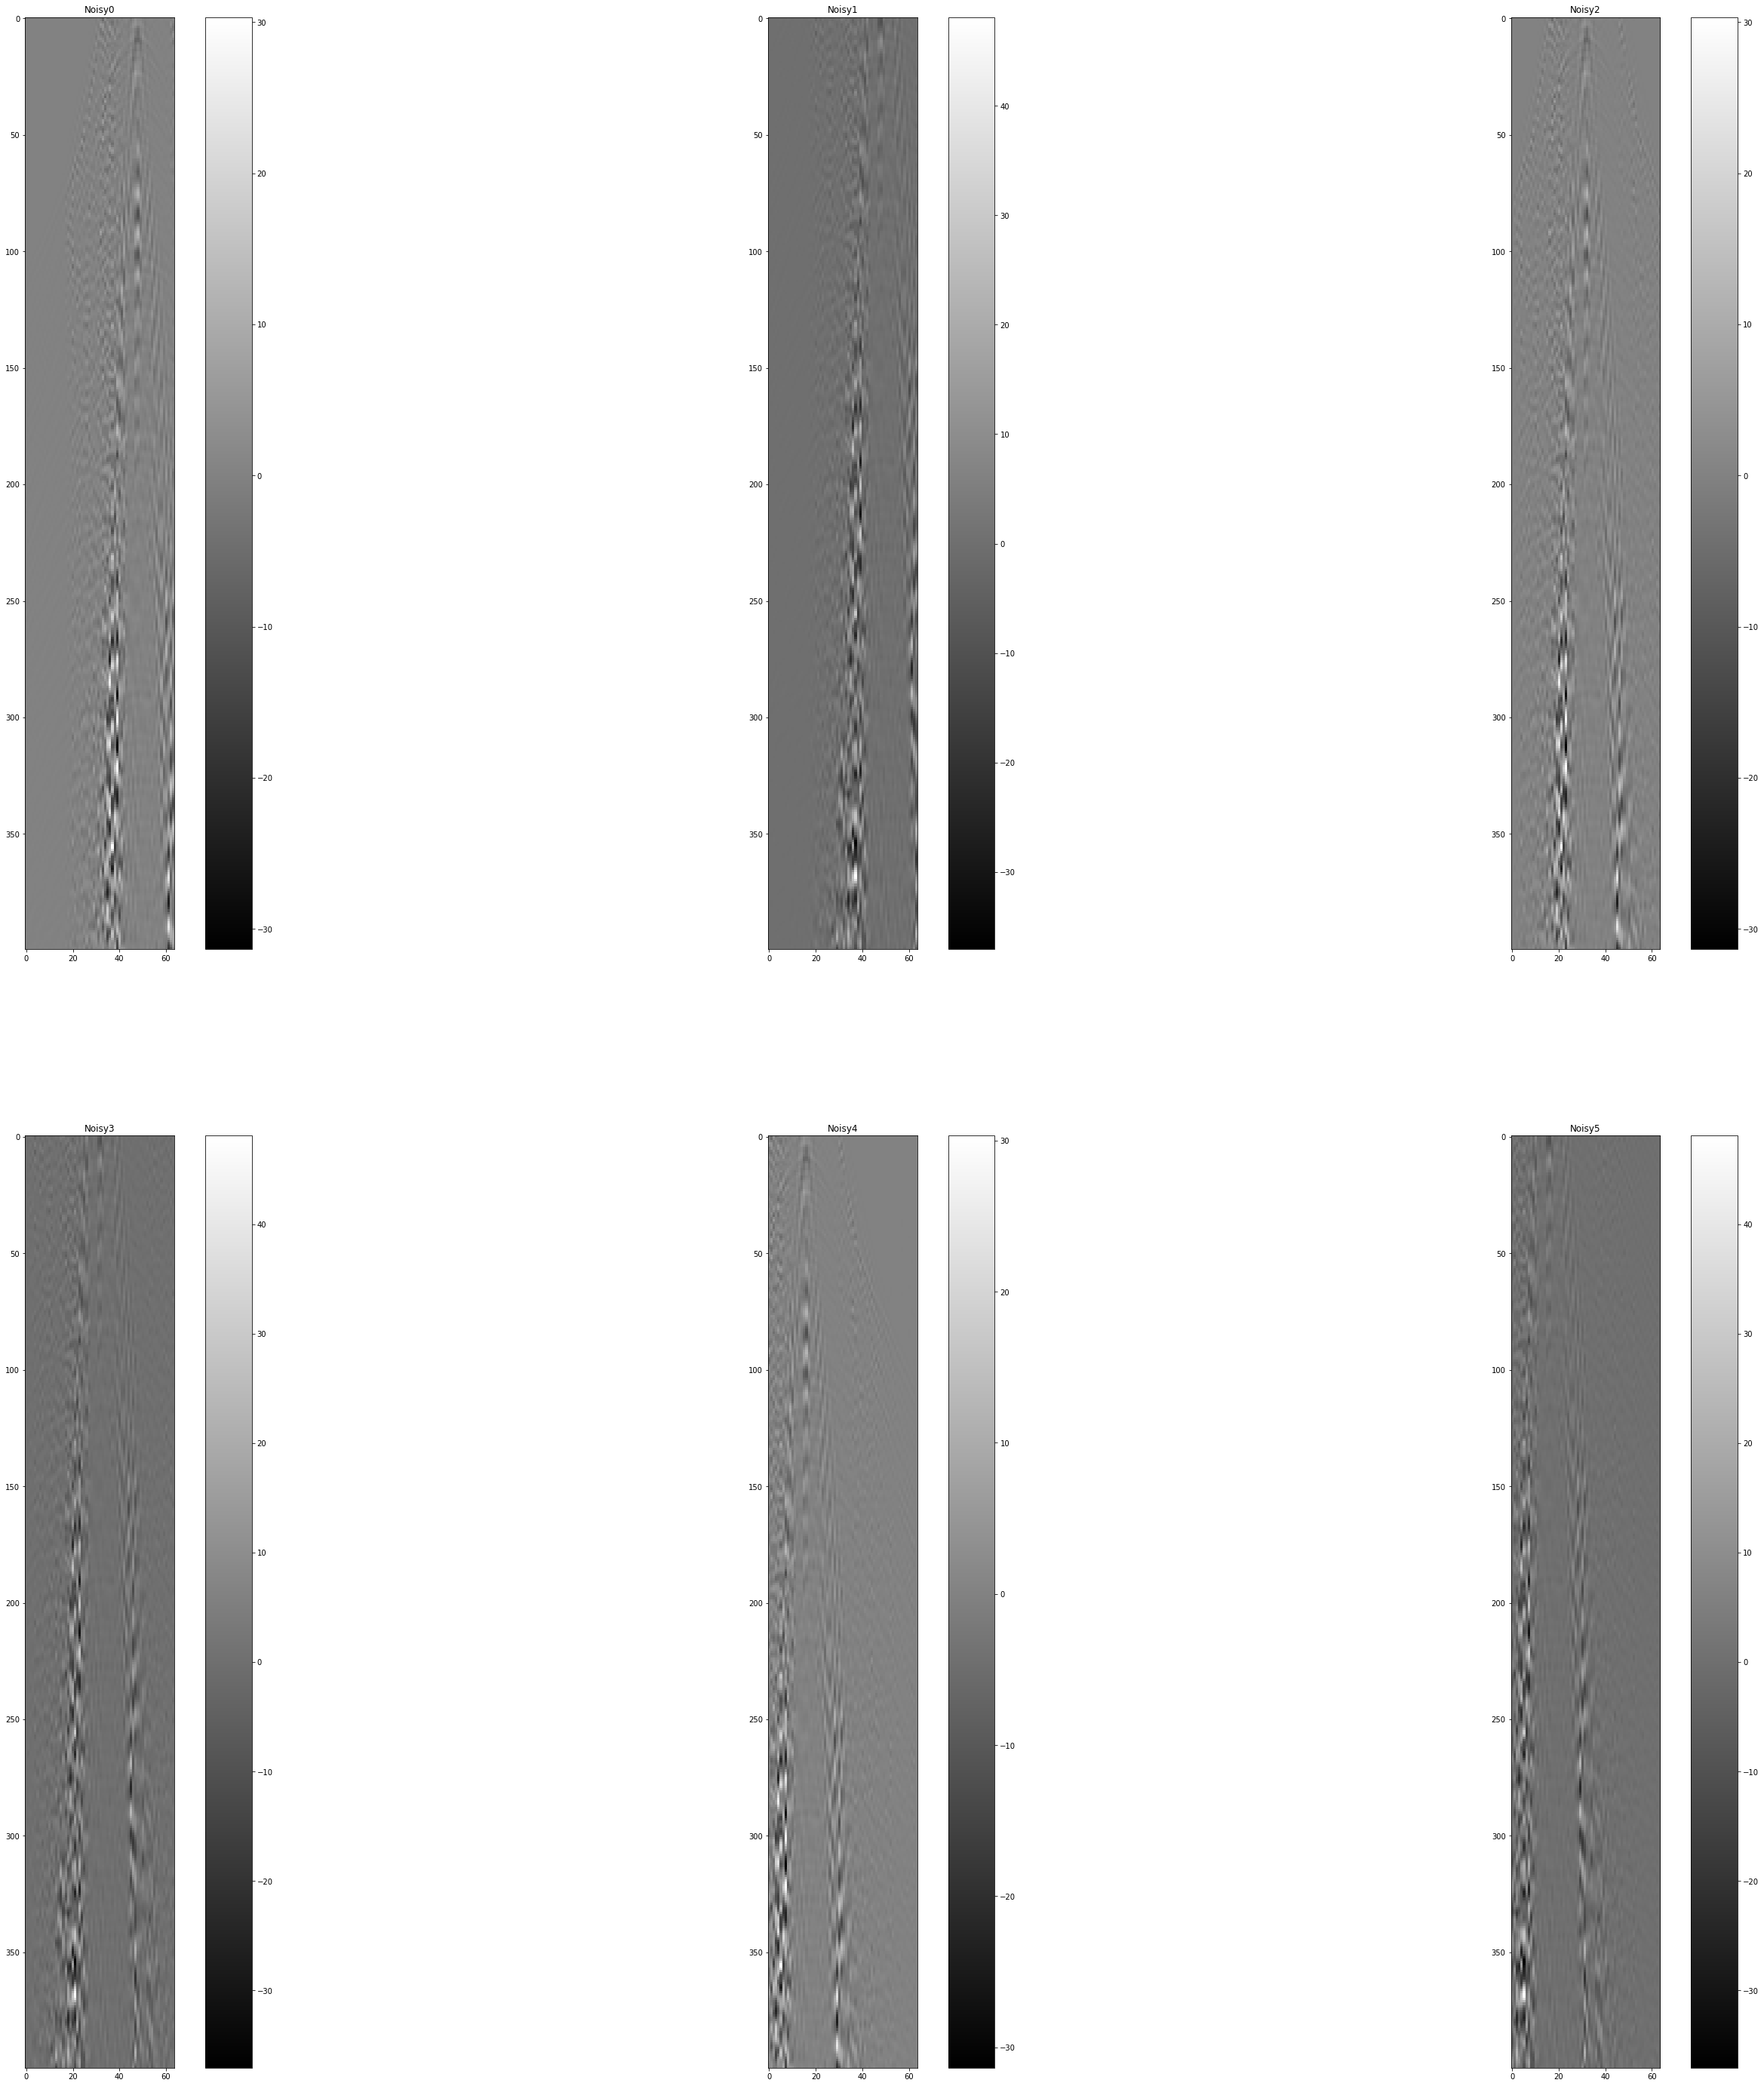

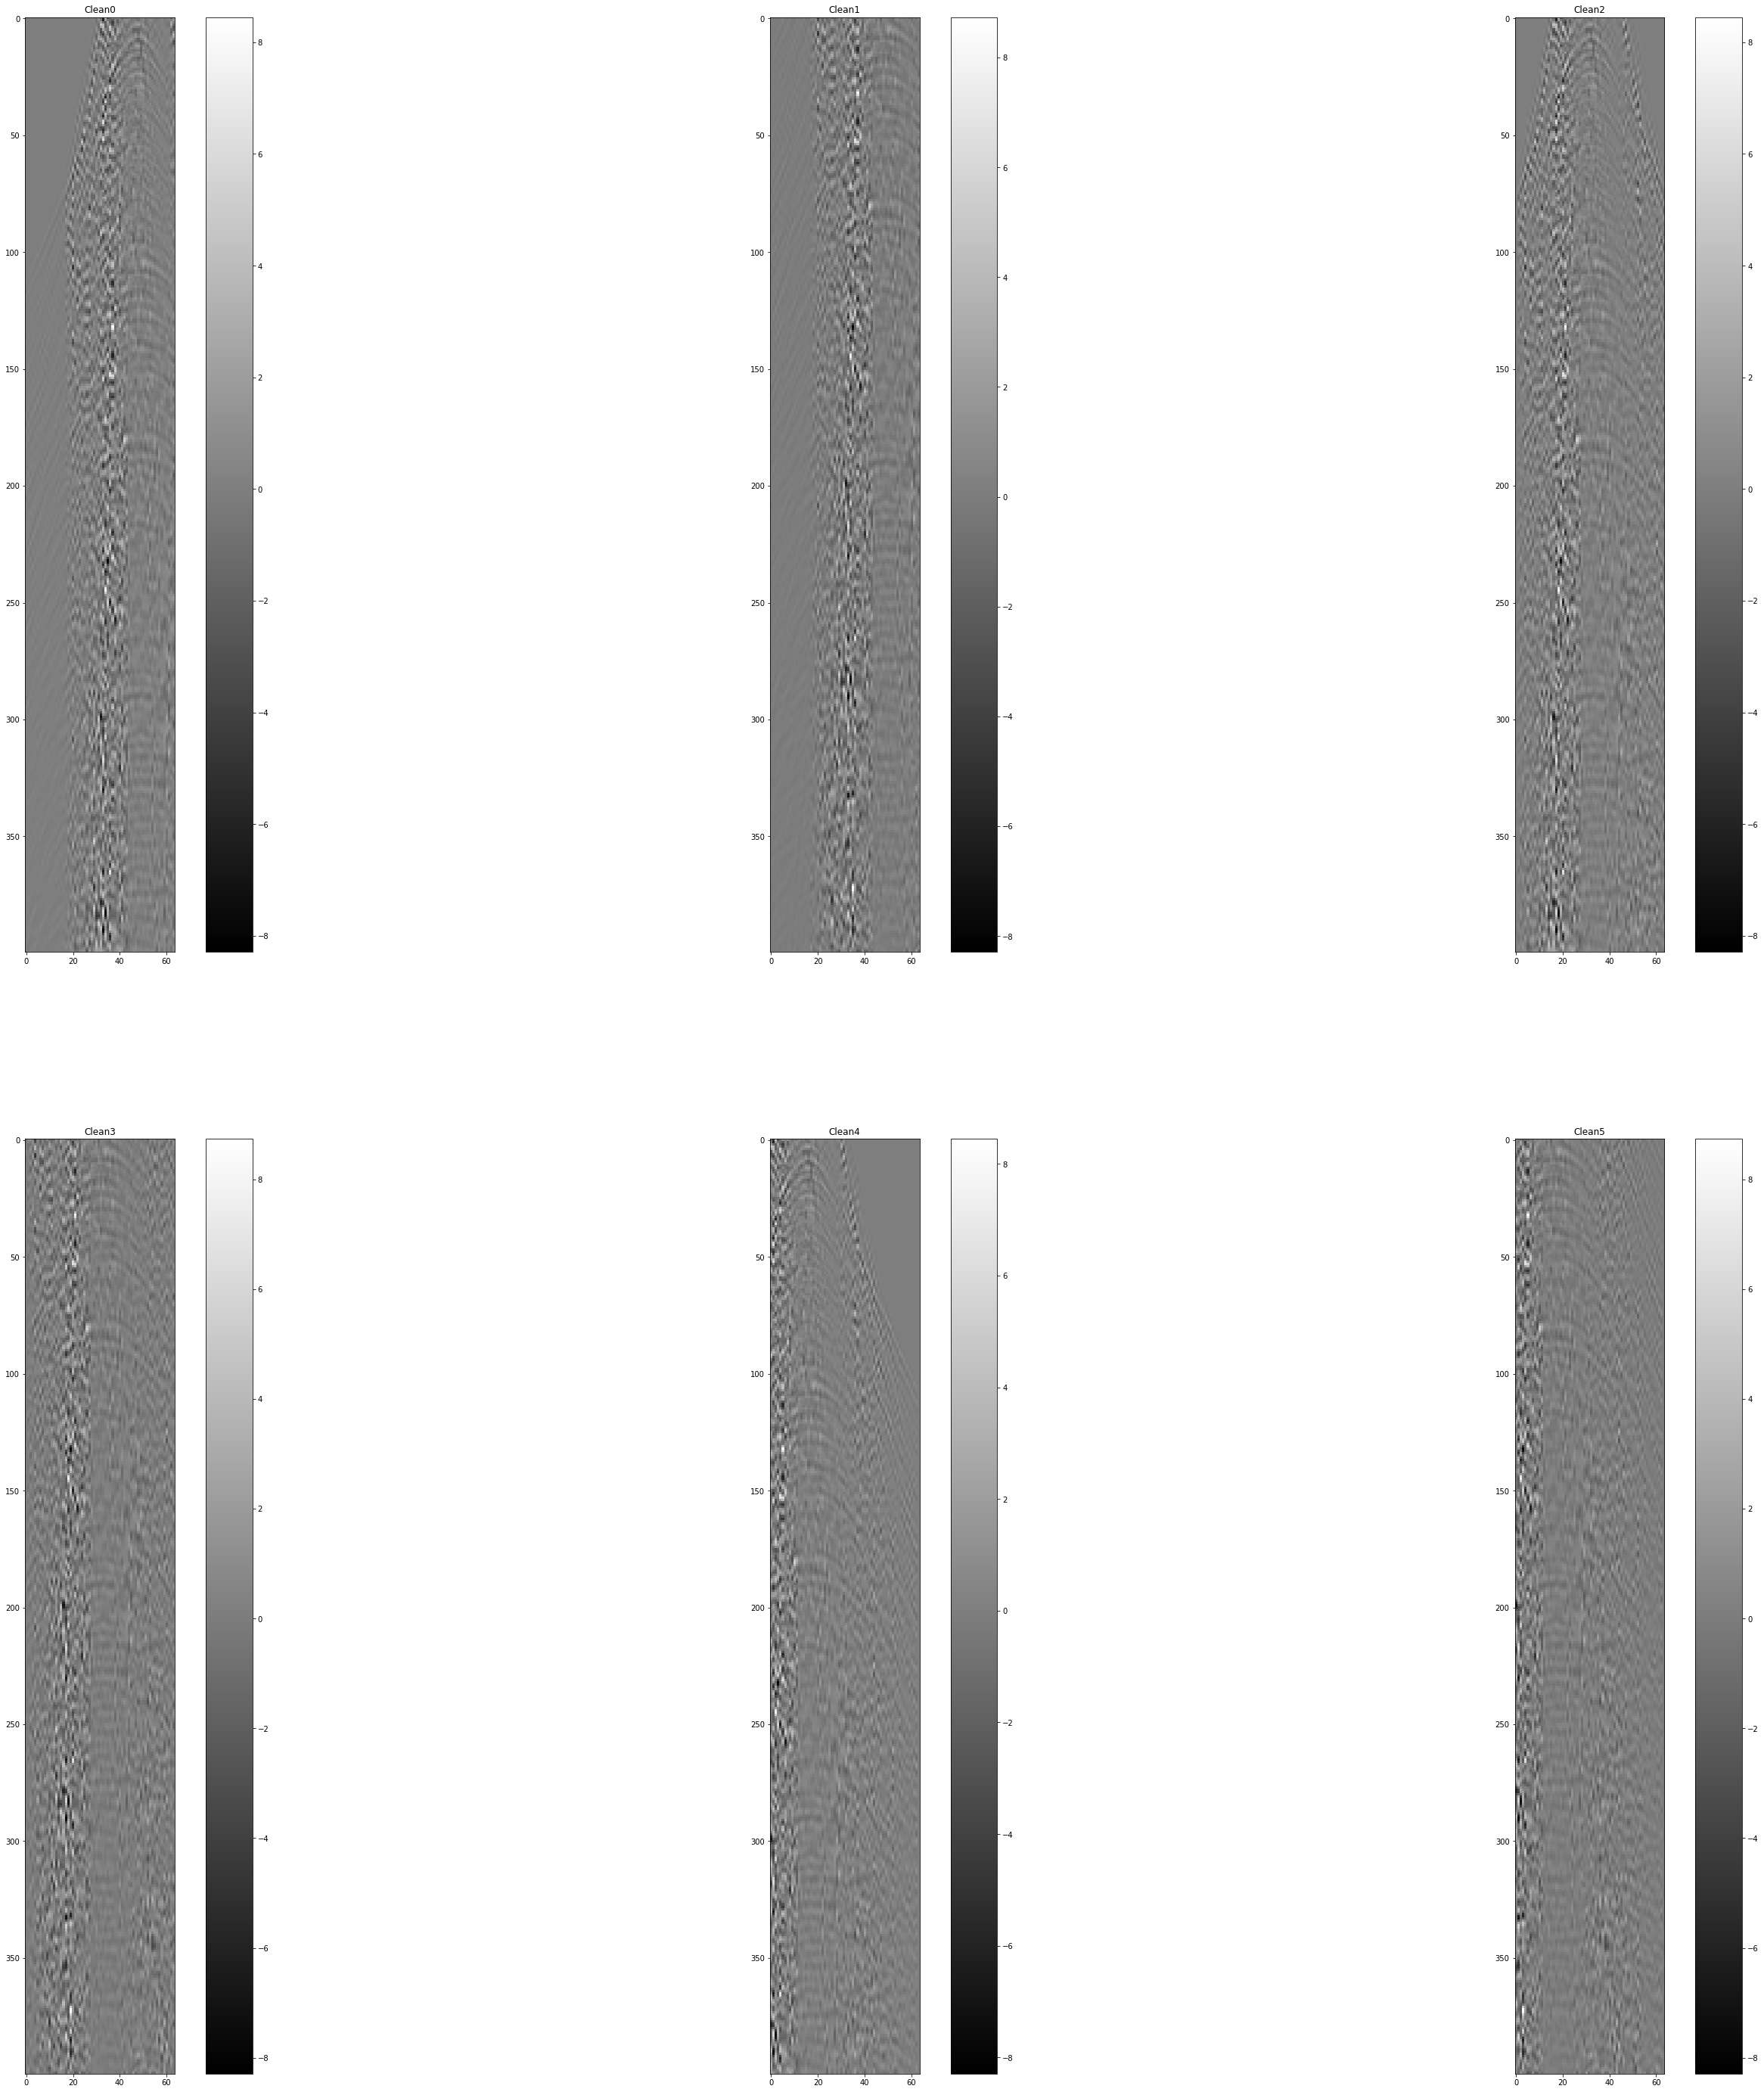

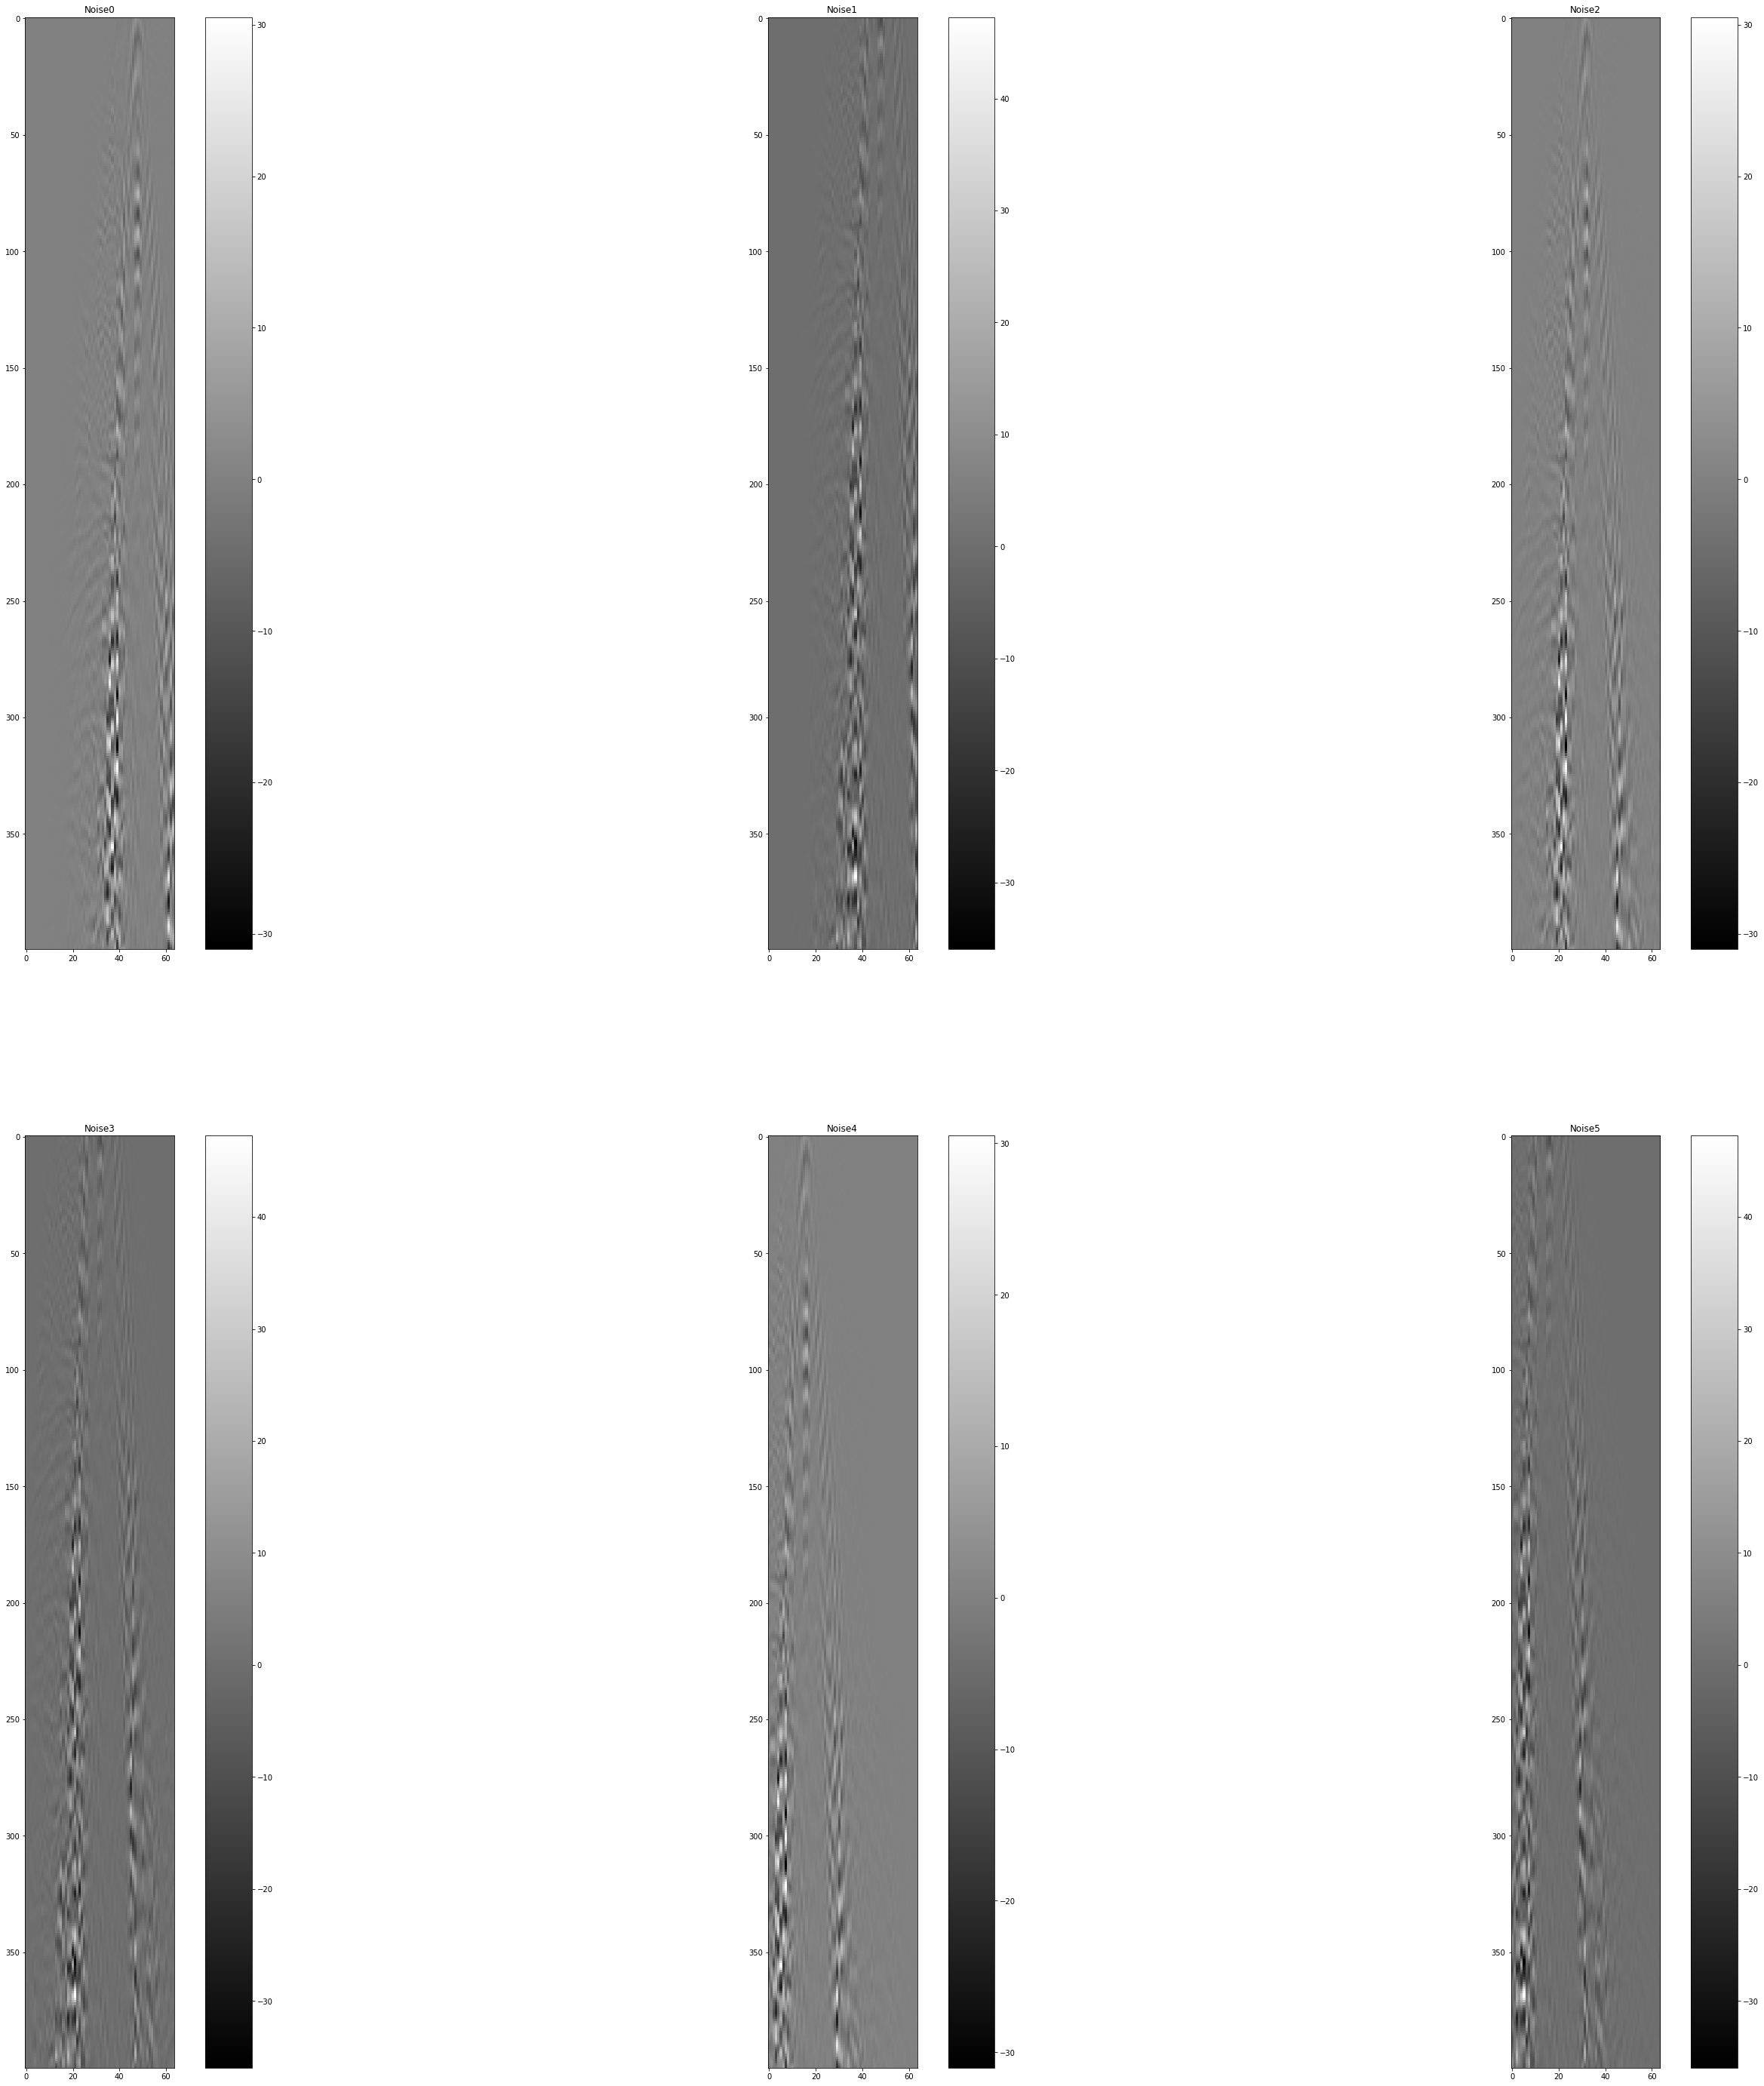

In [32]:
w = 3
h = 3
fig = plt.figure(figsize=(50, 50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testdat[i,:,:,0]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Noisy"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()

plt.show()  # finally, render the plot

w = 3
h = 3
fig = plt.figure(figsize=(50,50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testlbl[i,:,:,0]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Clean"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()
plt.show()  # finally, render the plot


w = 3
h = 3
fig = plt.figure(figsize=(50, 50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testnoise[i,:,:,0]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Noise"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()
    
plt.show()  # finally, render the plot




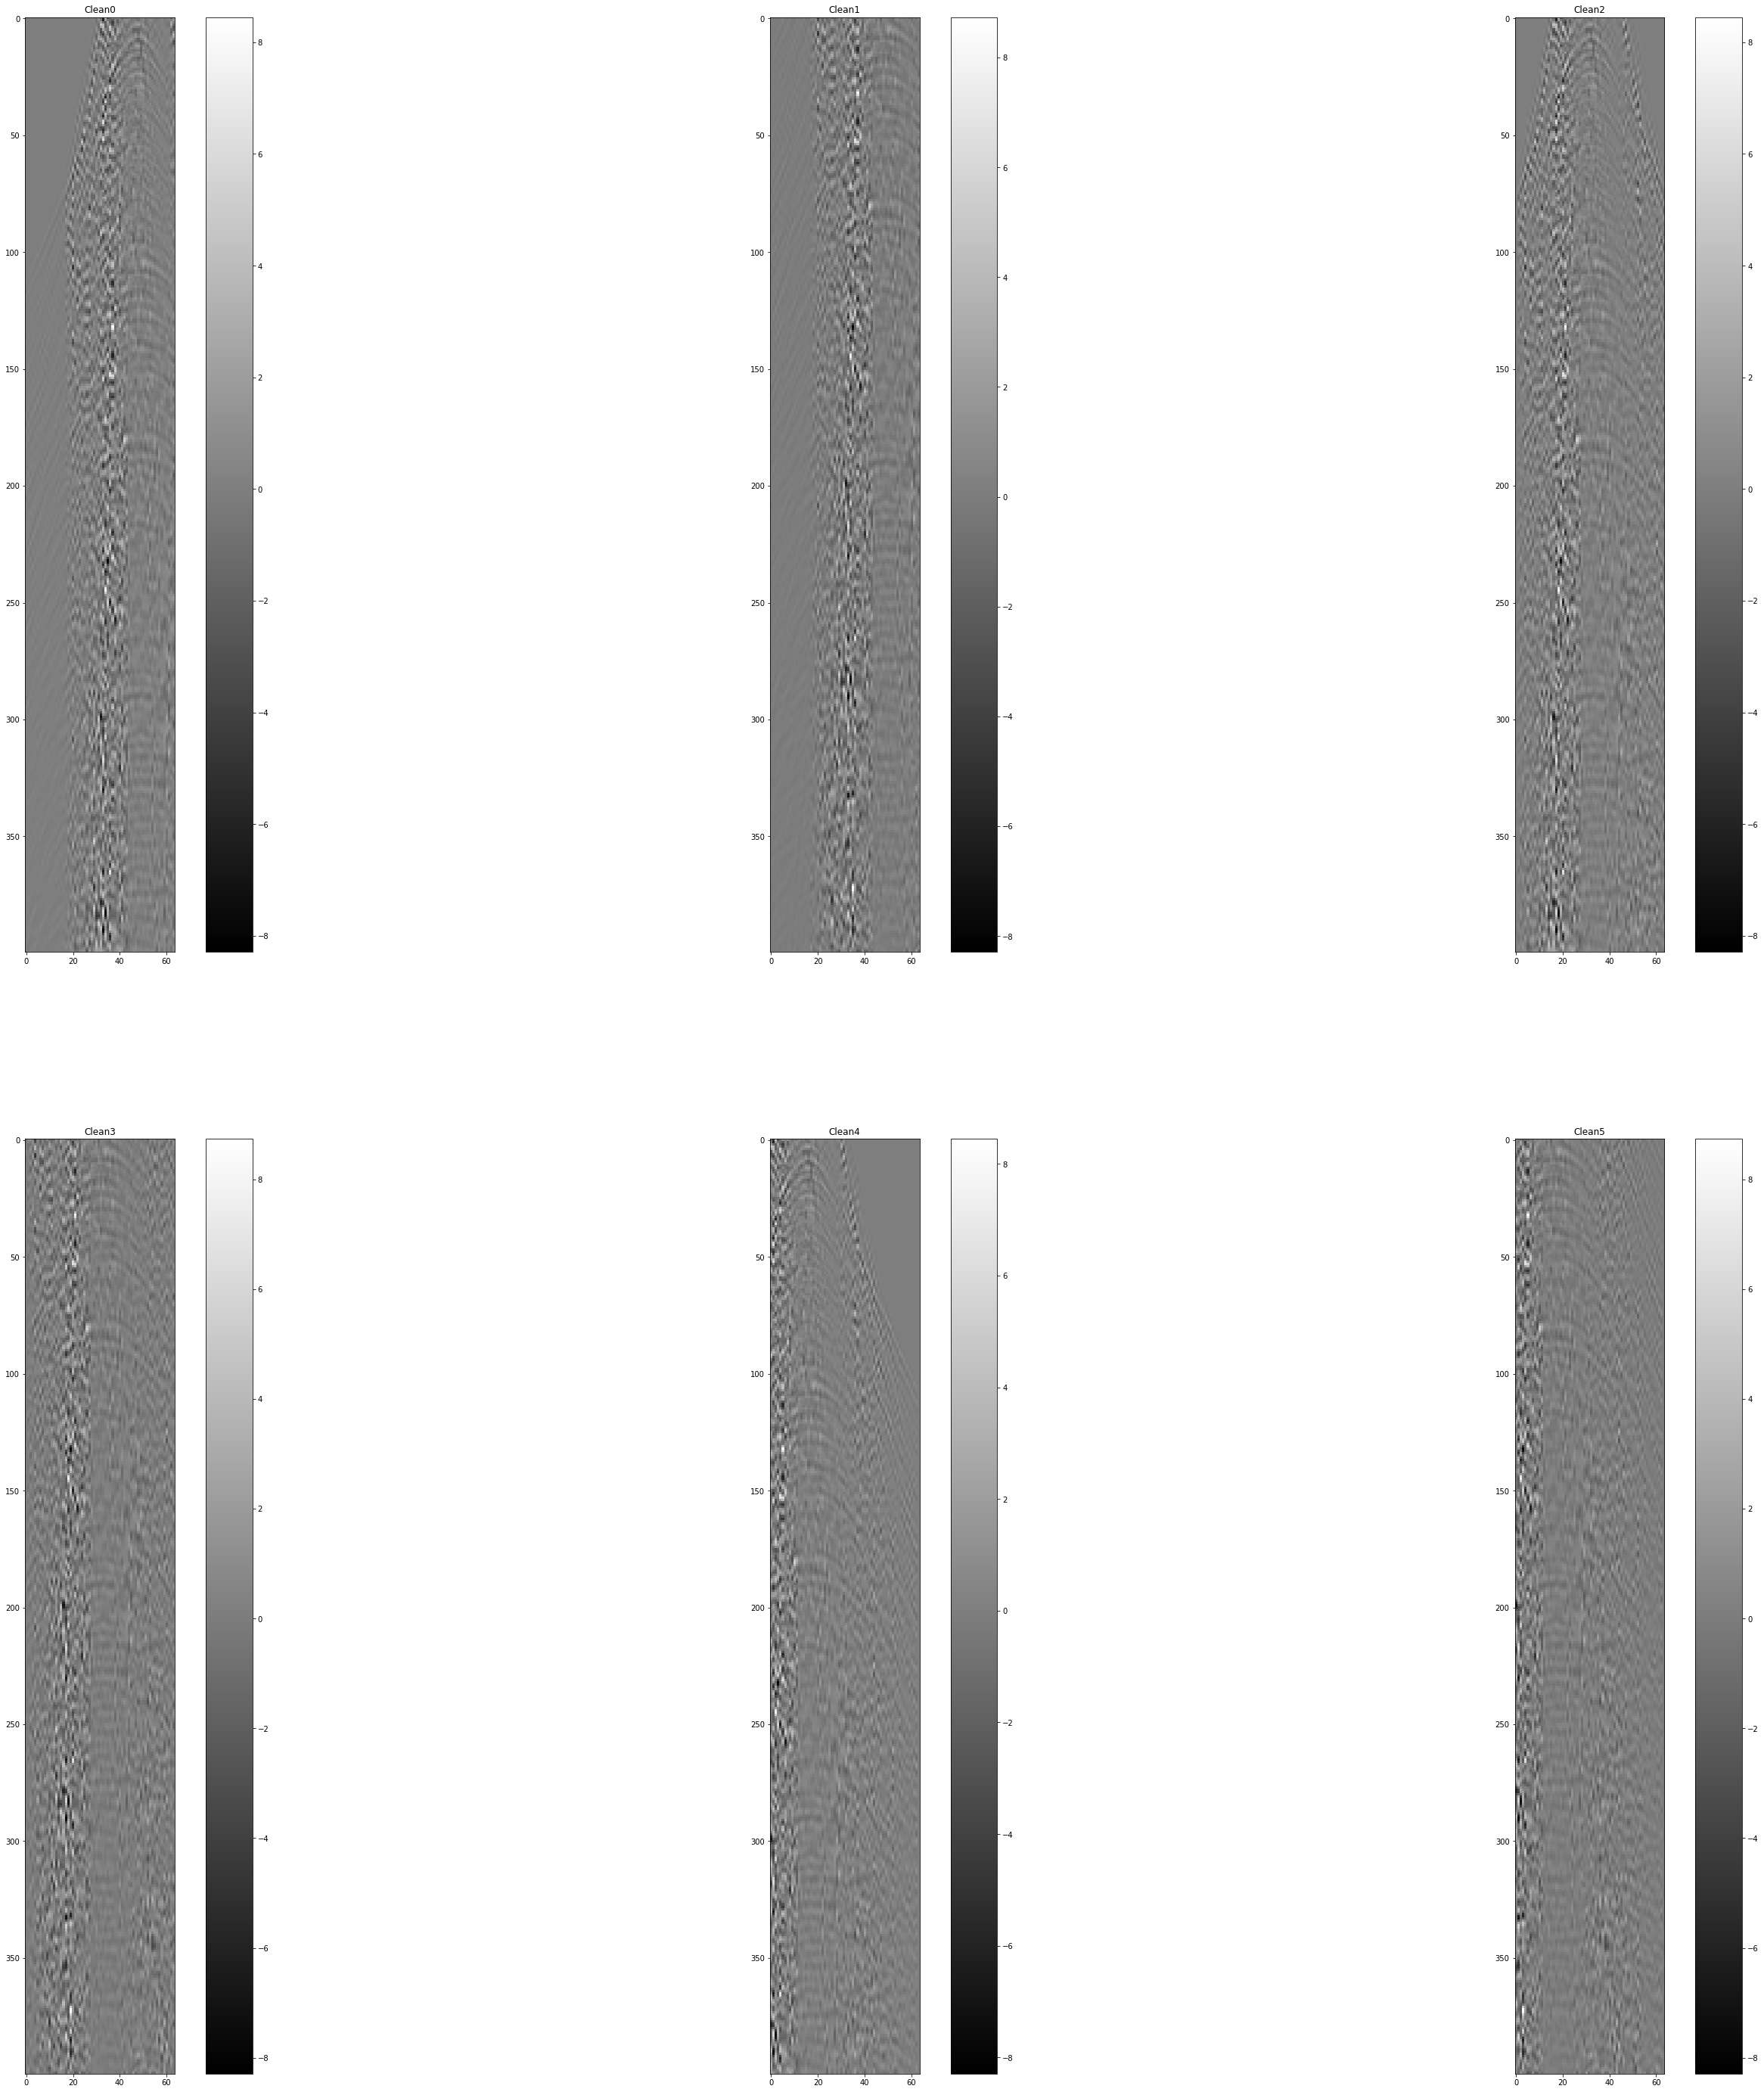

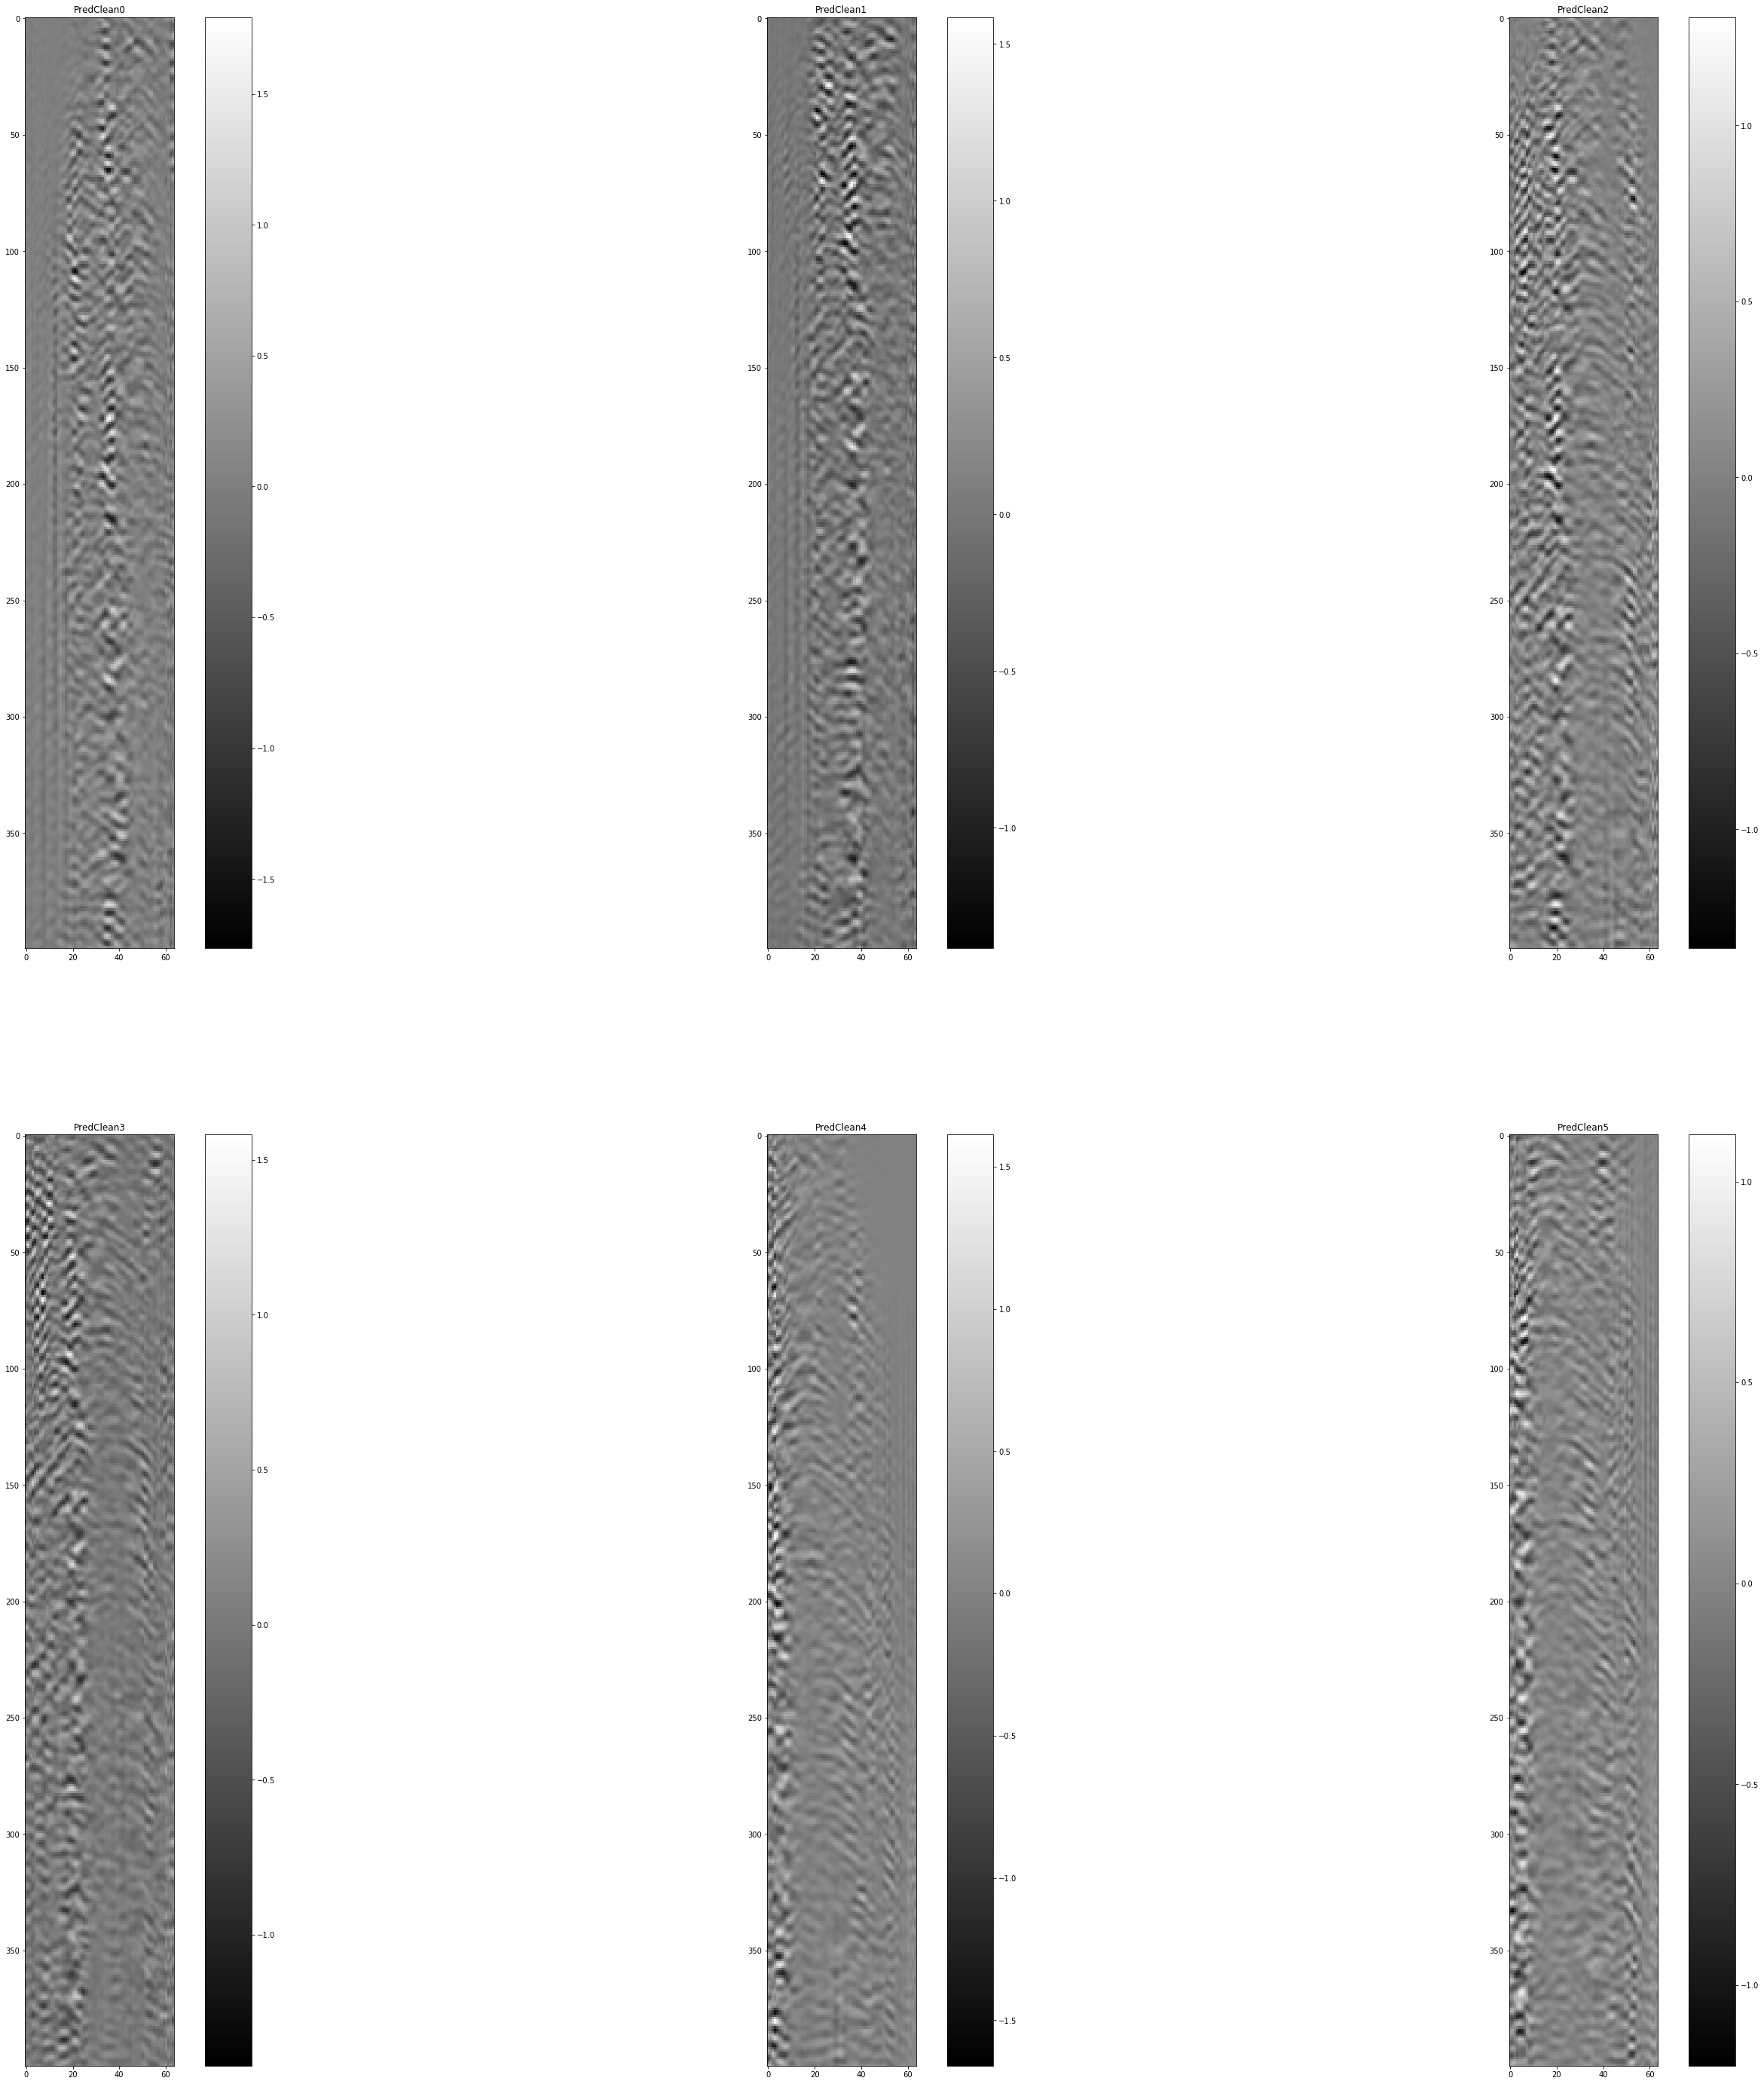

In [34]:
w = 3
h = 3
fig = plt.figure(figsize=(50, 50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testlbl[i,:,:,0]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Clean"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()

plt.show()  # finally, render the plot

w = 3
h = 3
fig = plt.figure(figsize=(50,50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testresult[i,:,:]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("PredClean"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()
plt.show()  # finally, render the plot





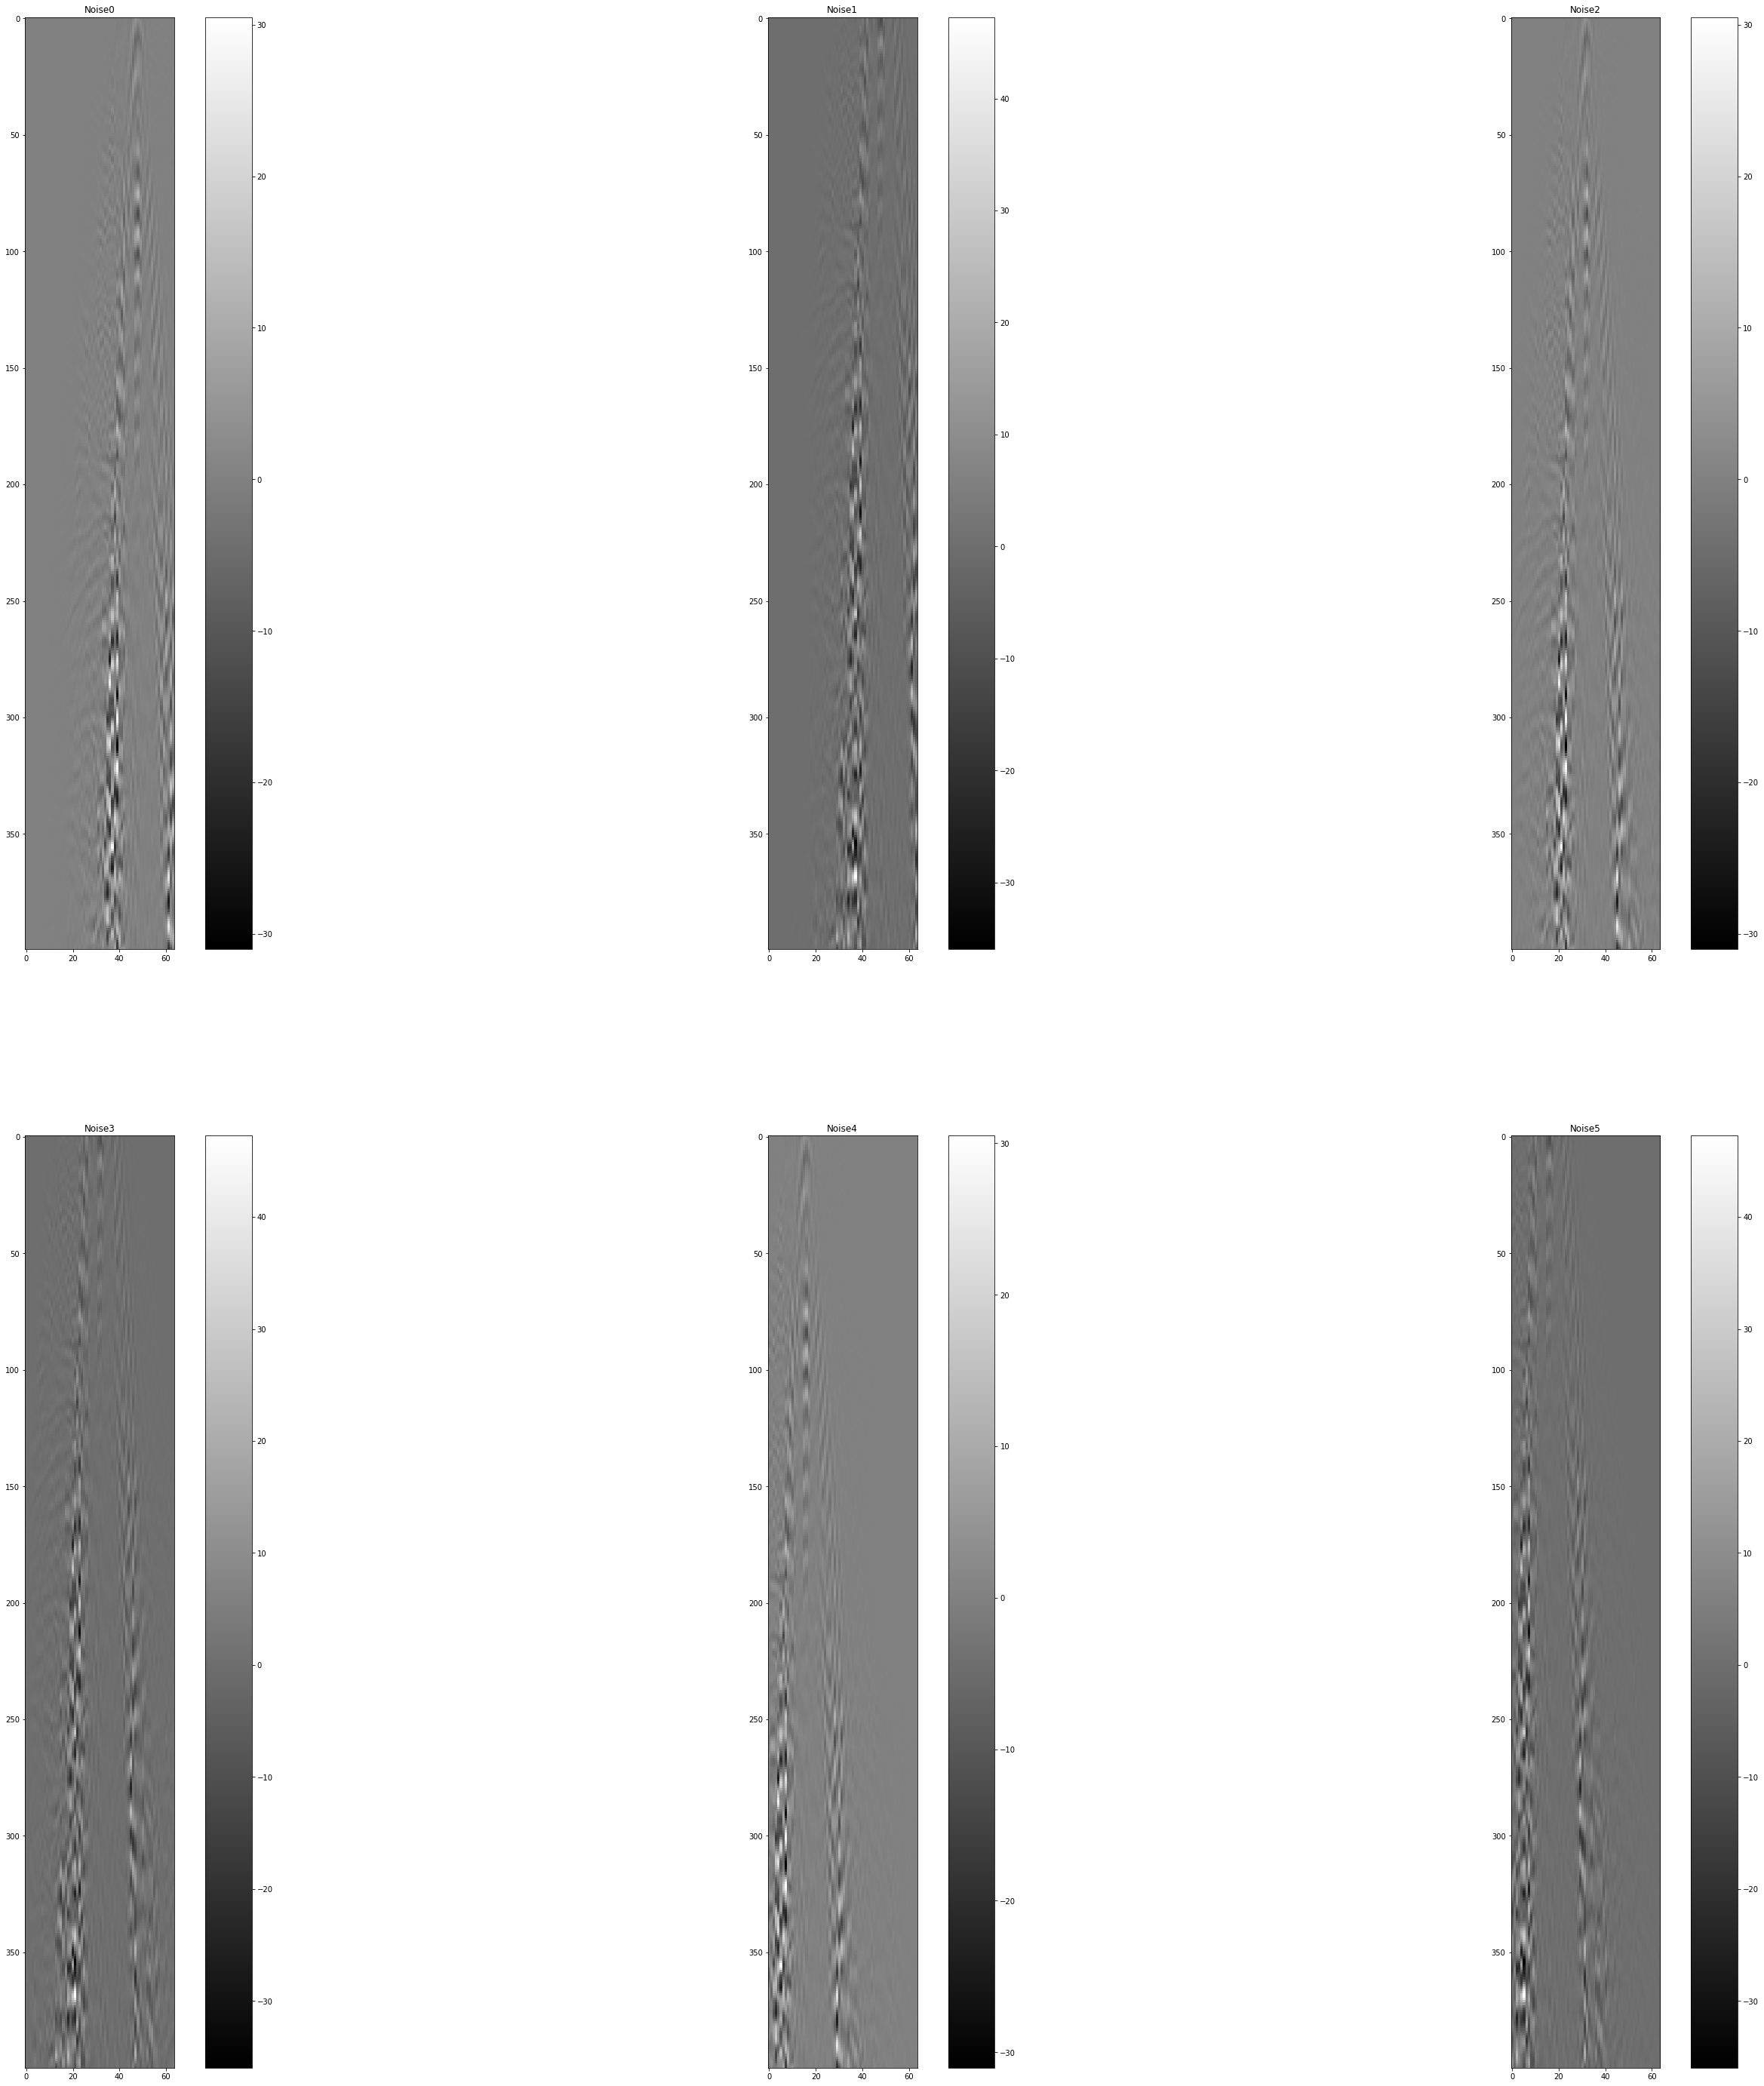

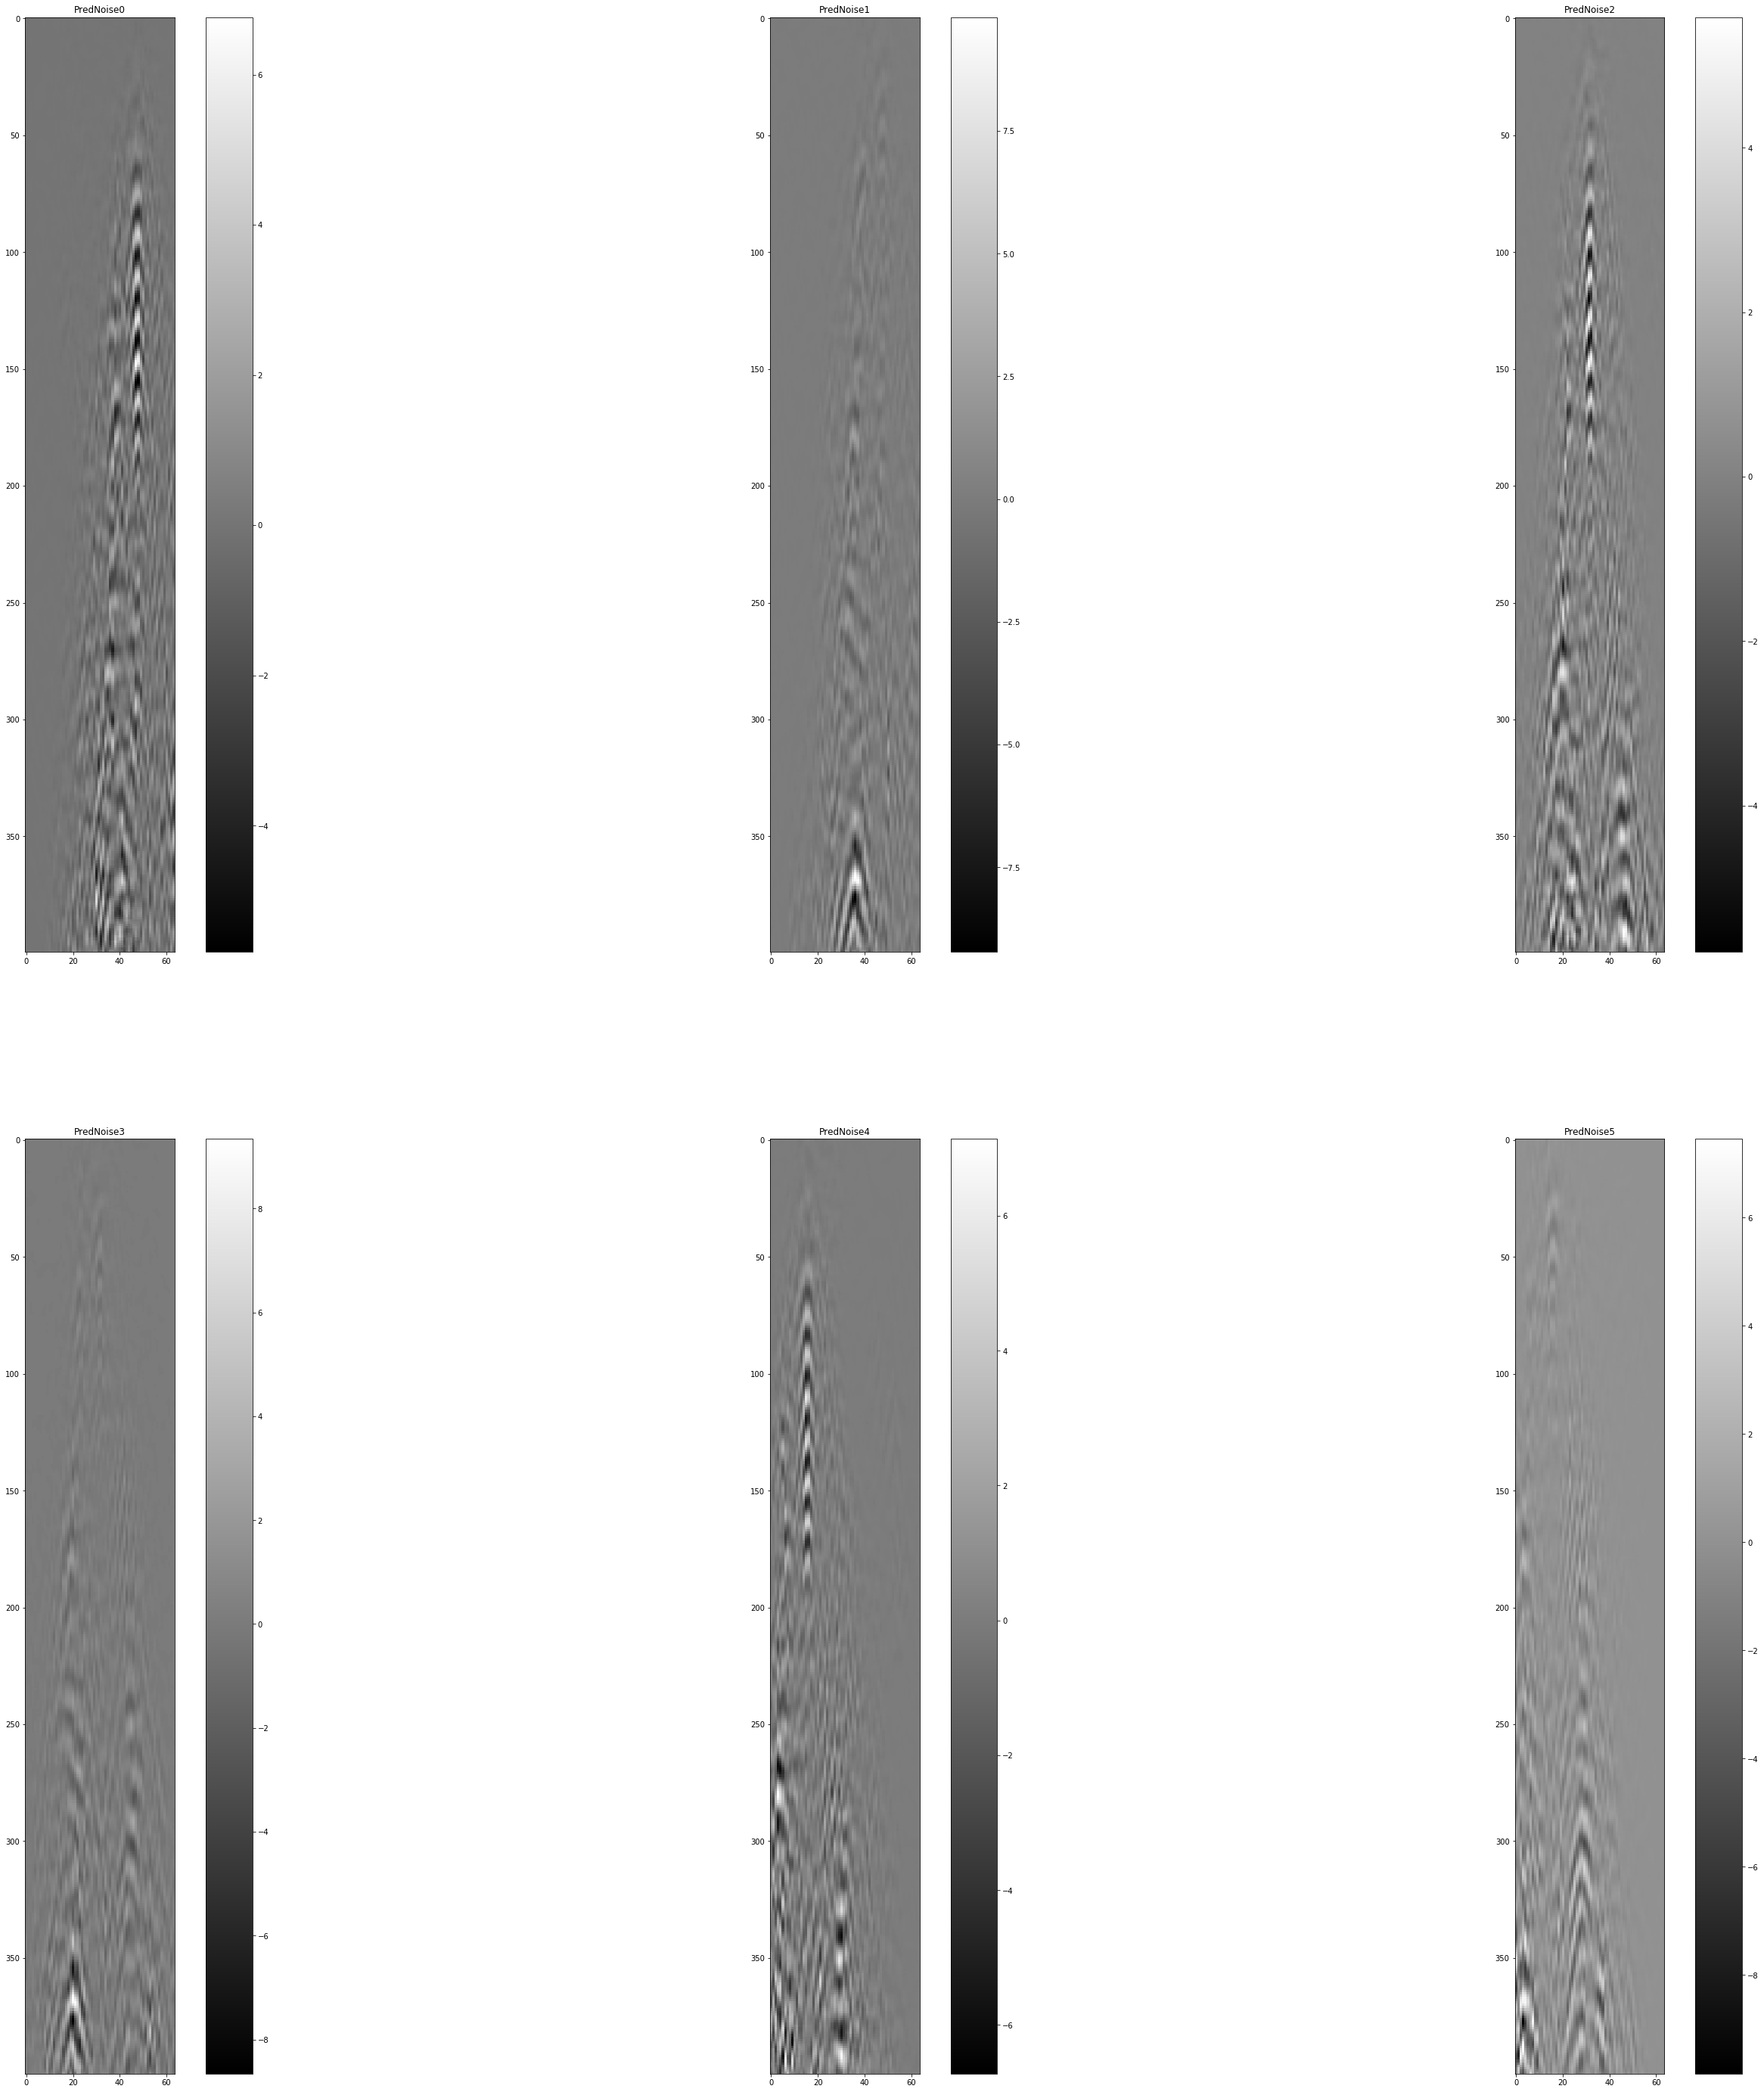

In [35]:
w = 3
h = 3
fig = plt.figure(figsize=(50, 50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testnoise[i,:,:,0]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Noise"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()

plt.show()  # finally, render the plot

w = 3
h = 3
fig = plt.figure(figsize=(50,50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testresultC[i,:,:]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("PredNoise"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()
plt.show()  # finally, render the plot





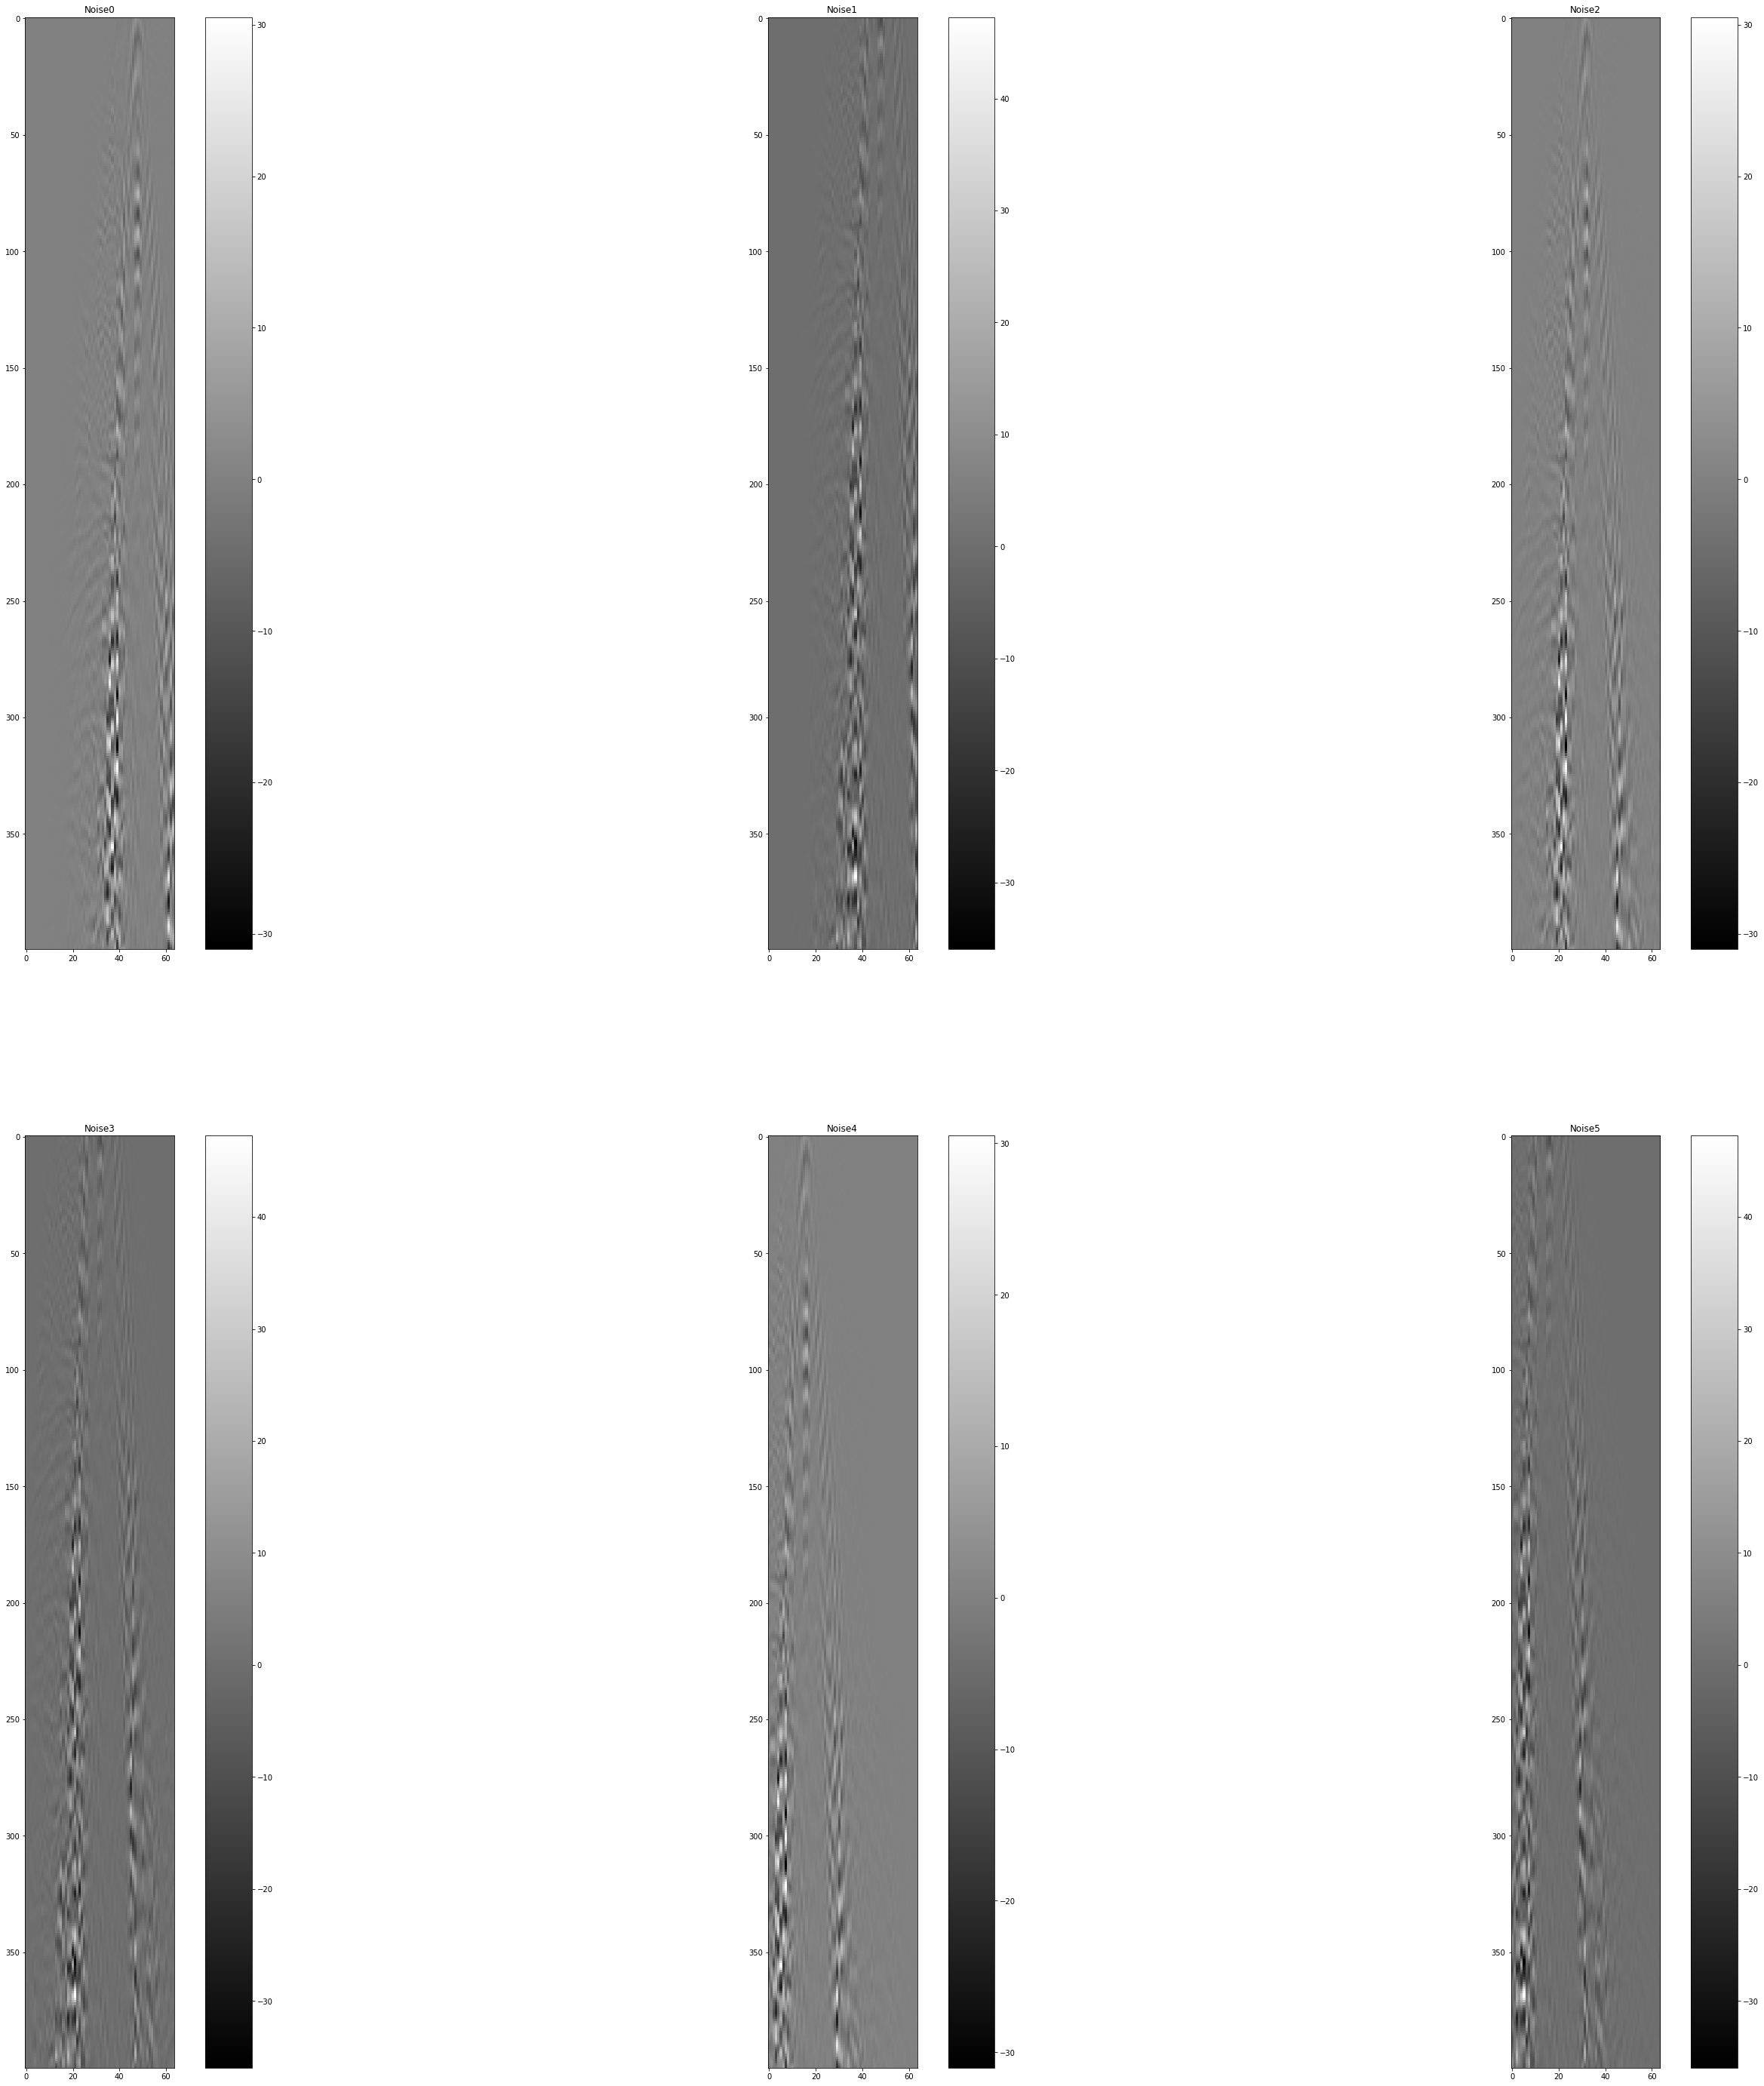

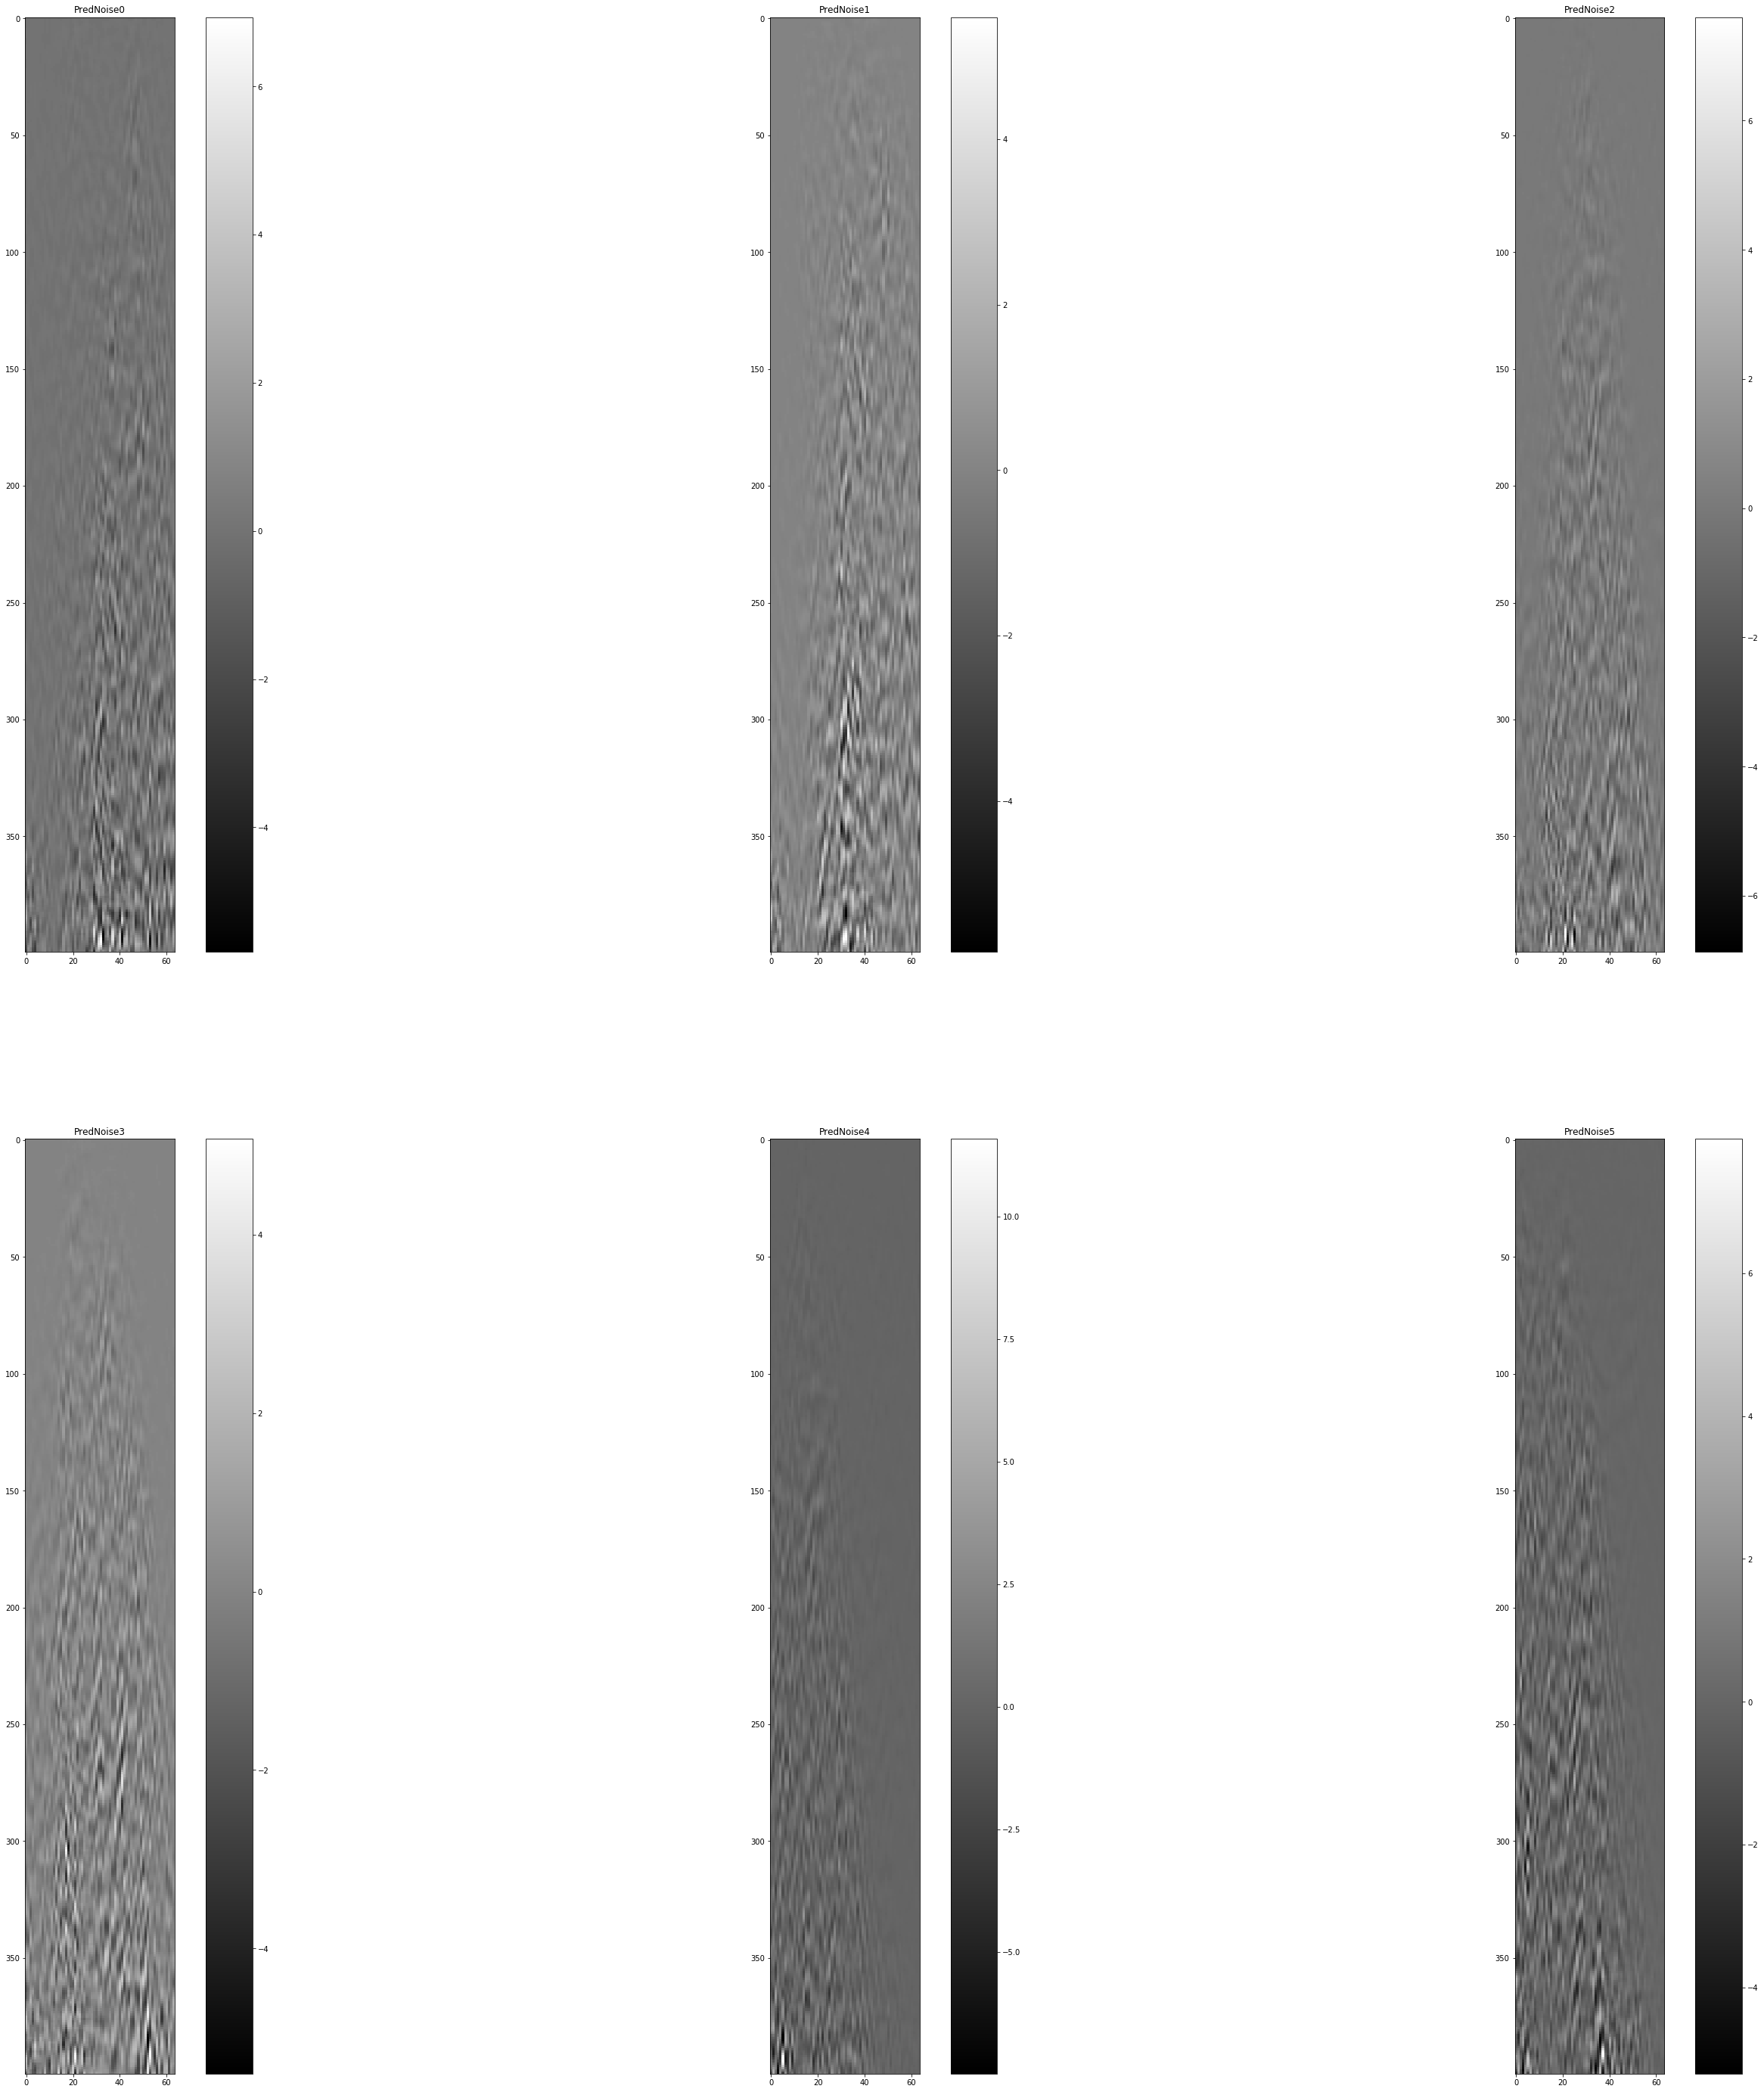

In [36]:
w = 3
h = 3
fig = plt.figure(figsize=(50, 50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testnoise[i,:,:,0]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("Noise"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()

plt.show()  # finally, render the plot

w = 3
h = 3
fig = plt.figure(figsize=(50,50))
columns = 3
rows = 2

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = testresultC2[i,:,:]
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title("PredNoise"+str(i))  # set title
    plt.imshow(np.transpose(img), cmap="gray")
    plt.colorbar()
plt.show()  # finally, render the plot



